In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

### 引入數據
1. CB開高低收平均數據 cb_market (原始數據為df_close, df_open, df_high, df_low, df_num)
2. 台股大盤開高低收數據 df_index
3. 台指期開高低收數據 df_future
4. VIX指數 vix_data
5. 個股數據 stock_close, stock_open, stock_low, stock_high

In [2]:
df_close = pd.read_csv("U:\CB數據庫\CB_收盤價.csv", encoding="utf-8-sig", index_col=0, parse_dates=True, low_memory=False)
df_open = pd.read_csv("U:\CB數據庫\CB_開盤價.csv", encoding="utf-8-sig", index_col=0, parse_dates=True, low_memory=False)
df_high = pd.read_csv("U:\CB數據庫\CB_最高價.csv", encoding="utf-8-sig", index_col=0, parse_dates=True, low_memory=False)
df_low = pd.read_csv("U:\CB數據庫\CB_最低價.csv", encoding="utf-8-sig", index_col=0, parse_dates=True, low_memory=False)
df_num = pd.read_csv("U:\CB數據庫\CB_單位.csv", encoding="utf-8-sig", index_col=0, parse_dates=True, low_memory=False)
cb_volume = pd.read_csv("U:\CB數據庫\CB_成交金額.csv", encoding="utf-8-sig", index_col=0, parse_dates=True, low_memory=False)

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
<>:6: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:4: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
<>:6: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Psc.PT6202\AppData\Local\Temp\ipykernel_10172\1481940683.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_close = pd.read_csv("U:\CB數據庫\CB_收盤價.csv", encoding="utf-8-sig", index_col=0, parse_dates=True, low_memory=False)
C:\Users\Psc.PT6202\AppData\Local\Temp\ipykernel_10172\1481940683.py:2: SyntaxWarning: invalid escape sequence '\C'
  df_open = pd.read_csv("U:\CB數據庫\CB_開盤價.csv", en

In [3]:
# 計算每日市場均價，只針對當天市場有數值之標的做計算
cb_market = pd.DataFrame({
    "Open_avg": df_open.mean(axis=1),
    "High_avg": df_high.mean(axis=1),
    "Low_avg": df_low.mean(axis=1),
    "Close_avg": df_close.mean(axis=1),
})

cb_market

,Open_avg,High_avg,Low_avg,Close_avg
日期,,,,
2007-01-02,126.009649,127.013158,125.491228,126.521053
2007-01-03,125.770370,126.686574,125.011111,126.026389
2007-01-04,127.683333,128.931019,127.210648,128.312963
2007-01-05,124.922816,125.821845,124.167961,125.239320
2007-01-08,125.394444,125.990909,124.523737,125.168182
...,...,...,...,...
2025-08-22,115.943514,116.642703,115.282432,115.900811
2025-08-25,116.297838,117.082703,115.567568,116.351622
2025-08-26,114.950510,116.068622,114.439541,115.660204


In [4]:
# 產出 Series
df_index_close = pd.read_csv(r"U:\Stock_Data\3_DataBase_Index\Close_Index.csv", encoding="utf-8-sig", index_col=0, parse_dates=True, low_memory=False)
df_index_close = df_index_close['#TWII']

df_index_open = pd.read_csv(r"U:\Stock_Data\3_DataBase_Index\Open_Index.csv", encoding="utf-8-sig", index_col=0, parse_dates=True, low_memory=False)
df_index_open = df_index_open['#TWII']

df_index_high = pd.read_csv(r"U:\Stock_Data\3_DataBase_Index\High_Index .csv", encoding="utf-8-sig", index_col=0, parse_dates=True, low_memory=False)
df_index_high = df_index_high['#TWII']

df_index_low = pd.read_csv(r"U:\Stock_Data\3_DataBase_Index\Low_Index.csv", encoding="utf-8-sig", index_col=0, parse_dates=True, low_memory=False)
df_index_low = df_index_low['#TWII']

In [5]:
# 將 Series 轉換成 Data Frame
df_index_close = df_index_close.to_frame(name="Close")
df_index_open = df_index_open.to_frame(name="Open")
df_index_high = df_index_high.to_frame(name="High")
df_index_low = df_index_low.to_frame(name="Low")

# 合併開高低收數據
df_index = df_index_close.join([df_index_open, df_index_high, df_index_low])
df_index

,Close,Open,High,Low
日期,,,,
2015-01-02,9252.31,9260.46,9307.26,9252.31
2015-01-05,9182.02,9292.31,9292.31,9182.02
2015-01-06,9043.44,9209.93,9209.93,9043.44
2015-01-07,9050.54,9051.94,9108.66,9050.54
2015-01-08,9154.03,9154.03,9246.62,9154.03
...,...,...,...,...
2025-08-22,23764.47,24033.02,24071.65,23764.47
2025-08-25,24108.75,24108.81,24362.02,24108.75
2025-08-26,24113.03,24237.36,24382.42,24113.03


In [6]:
# 產出 Series
df_future_close = pd.read_csv(r"U:\Stock_Data\3_DataBase_Index\Close_Future .csv", encoding="utf-8-sig", index_col=0, parse_dates=True, low_memory=False)
df_future_close = df_future_close['TX']

df_future_open = pd.read_csv(r"U:\Stock_Data\3_DataBase_Index\Open_Future.csv", encoding="utf-8-sig", index_col=0, parse_dates=True, low_memory=False)
df_future_open = df_future_open['TX']

df_future_high = pd.read_csv(r"U:\Stock_Data\3_DataBase_Index\High_Future.csv", encoding="utf-8-sig", index_col=0, parse_dates=True, low_memory=False)
df_future_high = df_future_high['TX']

df_future_low = pd.read_csv(r"U:\Stock_Data\3_DataBase_Index\Low_Future.csv", encoding="utf-8-sig", index_col=0, parse_dates=True, low_memory=False)
df_future_low = df_future_low['TX']

In [7]:
# 將 Series 轉換成 Data Frame
df_future_close = df_future_close.to_frame(name="Close")
df_future_open = df_future_open.to_frame(name="Open")
df_future_high = df_future_high.to_frame(name="High")
df_future_low = df_future_low.to_frame(name="Low")

# 合併開高低收數據
df_future = df_future_close.join([df_future_open, df_future_high, df_future_low])
df_future

,Close,Open,High,Low
日期,,,,
2015-01-05,9252,9238,9276,9155
2015-01-06,9058,9144,9153,9017
2015-01-07,9045,9042,9092,9033
2015-01-08,9257,9116,9259,9115
2015-01-09,9230,9328,9335,9217
...,...,...,...,...
2025-08-22,23750,23877,23982,23732
2025-08-25,24251,24120,24314,24070
2025-08-26,24253,24143,24281,24090


In [8]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2015, 6, 1)
end = datetime.datetime(2025, 8, 20)

vix_data = web.DataReader('VIXCLS', 'fred', start, end)

In [9]:
vix_data.rename(columns={'VIXCLS': 'VIX_Close'}, inplace=True)

引入個股數據

In [10]:
stock_close = pd.read_csv(r"U:\Stock_Data\3_DataBase_TwStock\Close_adj.csv", encoding="utf-8-sig", index_col=0, parse_dates=True, low_memory=False)
stock_open = pd.read_csv(r"U:\Stock_Data\3_DataBase_TwStock\Open_adj.csv", encoding="utf-8-sig", index_col=0, parse_dates=True, low_memory=False)
stock_low = pd.read_csv(r"U:\Stock_Data\3_DataBase_TwStock\Low_adj.csv", encoding="utf-8-sig", index_col=0, parse_dates=True, low_memory=False)
stock_high = pd.read_csv(r"U:\Stock_Data\3_DataBase_TwStock\High_adj.csv", encoding="utf-8-sig", index_col=0, parse_dates=True, low_memory=False)
stock_num = pd.read_csv(r"U:\Stock_Data\3_DataBase_TwStock\Volume.csv", encoding="utf-8-sig", index_col=0, parse_dates=True, low_memory=False)

In [11]:
stock_close

,1101,1102,1103,1104,1108,1109,1110,1201,1203,1210,...,9950,9951,9955,9958,9960,9962,3135,7547,7721,7753
日期,,,,,,,,,,,,,,,,,,,,,
2015-01-06,19.07,20.68,9.33,13.26,6.24,8.72,14.94,20.40,16.41,14.04,...,19.50,68.27,18.55,8.37,15.69,7.05,NaN,NaN,NaN,NaN
2015-01-07,19.00,20.90,9.37,13.32,6.27,8.72,14.80,20.20,16.38,14.07,...,19.46,69.81,18.65,8.29,15.41,7.05,NaN,NaN,NaN,NaN
2015-01-08,19.07,21.15,9.43,13.34,6.27,8.72,14.76,20.24,16.28,14.17,...,19.46,70.12,18.60,8.25,15.76,7.11,NaN,NaN,NaN,NaN
2015-01-09,18.87,21.15,9.46,13.37,6.27,8.85,14.85,20.32,16.31,14.25,...,19.58,70.12,18.60,8.29,15.76,7.08,NaN,NaN,NaN,NaN
2015-01-12,18.39,20.90,9.37,13.39,6.27,8.76,14.80,20.28,16.34,13.91,...,19.79,70.43,18.75,8.17,15.76,7.11,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-22,23.10,37.95,13.40,29.80,15.50,15.70,17.40,15.65,39.40,53.50,...,10.80,61.60,27.60,196.50,22.40,11.45,NaN,NaN,NaN,NaN
2025-08-25,23.30,38.10,13.45,29.85,15.45,15.75,17.70,15.60,39.55,53.30,...,10.70,62.40,27.60,192.00,22.20,11.35,NaN,NaN,NaN,NaN
2025-08-26,23.10,37.50,13.40,30.10,15.35,15.65,17.45,15.65,39.60,53.00,...,10.45,63.00,27.80,187.00,21.90,11.25,NaN,NaN,NaN,NaN


In [12]:
stock_num

,15,50,51,52,53,54,55,56,57,58,...,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
日期,,,,,,,,,,,,,,,,,,,,,
2015-01-05,NaN,6295.612,27.000,41.00,17.0,100.0,966.0,508.718,227.0,22.0,...,231.142,2214.272,488.231,517.878,49.000,104.00,44.015,248.207,375.576,75.058
2015-01-06,NaN,19501.826,142.500,17.00,31.0,6.0,629.0,908.140,39.0,10.0,...,142.000,3430.785,385.100,155.001,70.085,294.00,74.279,220.102,789.062,119.000
2015-01-07,NaN,6991.542,15.030,27.00,13.0,8.0,154.0,336.998,60.0,4.0,...,94.597,2471.828,479.008,59.060,79.124,381.00,50.144,144.156,313.668,28.000
2015-01-08,NaN,13153.525,42.518,8.01,13.0,5.0,263.0,760.481,38.0,14.0,...,69.760,2799.011,375.098,32.571,62.000,130.06,53.723,209.650,763.503,67.230
2015-01-09,NaN,5891.981,18.523,8.00,11.0,5.0,280.1,375.900,46.0,13.0,...,101.318,2432.914,287.000,56.004,87.000,124.00,55.336,196.361,383.669,30.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.000,6808.000,131.000,0.000,54.000,82.00,326.000,3689.000,1.000,70.000
2025-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43.000,17382.000,214.000,37.000,83.000,267.00,332.000,4654.000,11.000,42.000
2025-08-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.000,157726.000,158.000,10.000,33.000,134.00,382.000,4300.000,34.000,25.000


計算成交金額

In [ ]:
import pandas as pd

# 取共同的股票代號與日期
common_columns = stock_close.columns.intersection(stock_num.columns)
common_index = stock_close.index.intersection(stock_num.index)

# 對齊兩個 DataFrame
aligned_close = stock_close.loc[common_index, common_columns]
aligned_num = stock_num.loc[common_index, common_columns]

# 計算成交金額
stock_volume = aligned_close * aligned_num * 1000
print(stock_volume.head())

stock_volume.to_csv("U:\CB數據庫\stock成交金額.csv")

<>:20: SyntaxWarning: invalid escape sequence '\C'
<>:20: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Psc.PT6202\AppData\Local\Temp\ipykernel_10172\3833534861.py:20: SyntaxWarning: invalid escape sequence '\C'
  stock_volume.to_csv("U:\CB數據庫\stock成交金額.csv")


                    1101         1102        1103        1104        1108  \
日期                                                                          
2015-01-06  1.459698e+08  91233542.40  1790529.63  4075354.92  1804770.24   
2015-01-07  1.656615e+08  97252527.90  1458646.64  2211000.12  1235302.86   
2015-01-08  1.658666e+08  74716456.95  3187971.81  4065991.98  1573782.54   
2015-01-09  1.980242e+08  37790312.40  1488833.72  2331514.08   977336.25   
2015-01-12  2.711386e+08  58443088.00  1697900.22  5638796.80  1116060.00   

                  1109       1110         1201        1203          1210  ...  \
日期                                                                        ...   
2015-01-06  2284640.00  959148.00  29155659.60  1107757.05  2.681244e+07  ...   
2015-01-07  2099104.56  296000.00  22066500.20   733136.04  2.060829e+07  ...   
2015-01-08   322640.00  464910.48  26437346.32  3958449.44  2.240997e+07  ...   
2015-01-09  1150588.50  274725.00  16727667.84  2138436

### CB市場均價對比台股大盤

#### 觀察CB市場與台股大盤之連動性

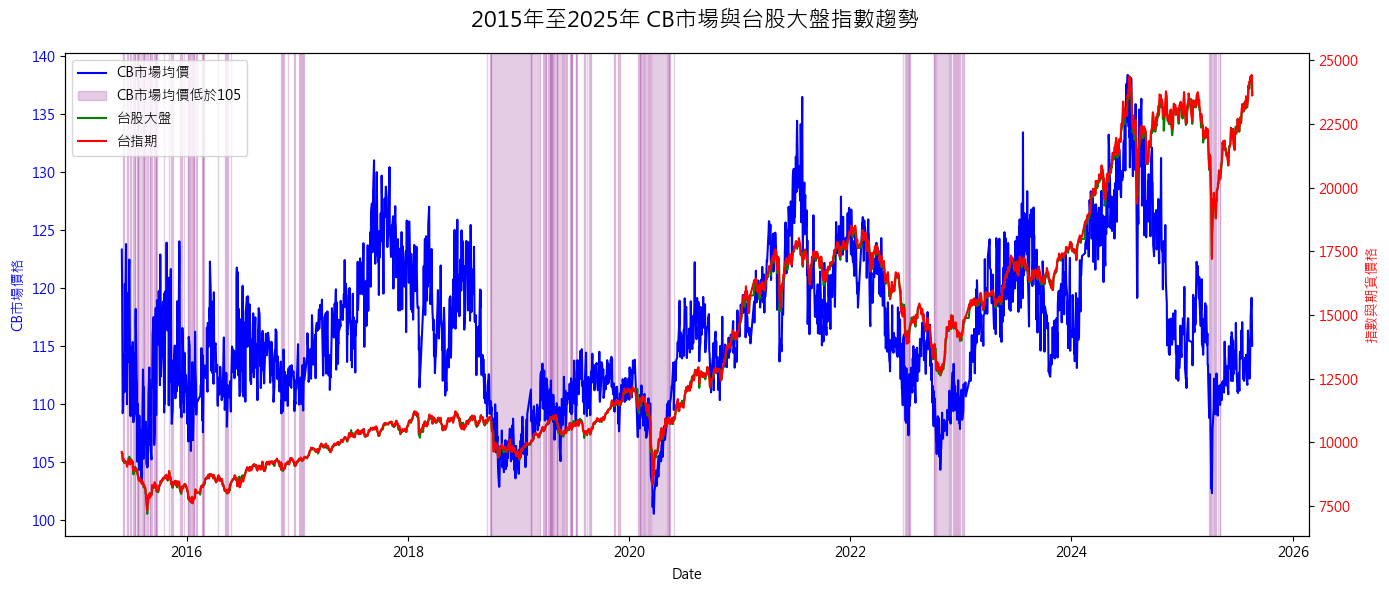

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import ticker as mtick
from matplotlib import rcParams

rcParams['font.family'] = 'Microsoft JhengHei'

# 設定日期範圍
start_date = '2015-06-01'
end_date = '2025-08-20'

# 篩選資料（透過 index）
cb_filtered = cb_market.loc[start_date:end_date]
index_filtered = df_index.loc[start_date:end_date]
future_filtered = df_future.loc[start_date:end_date]

# 建立圖形與主軸
fig, ax1 = plt.subplots(figsize=(14, 6))

# 左側 Y 軸：CB Market
ax1.plot(cb_filtered.index, cb_filtered['Close_avg'], label='CB市場均價', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('CB市場價格', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 標示 CB 均價 < 105 的區間
regime_records = []
cb_below_105 = cb_filtered['Close_avg'] < 110
in_regime = False
start = None

for date, is_below in cb_below_105.items():
    if is_below and not in_regime:
        start = date
        in_regime = True
    elif not is_below and in_regime:
        end = date
        ax1.axvspan(start, end, color='purple', alpha=0.2)

        # 區間資料
        cb_segment = cb_filtered.loc[start:end]
        index_segment = index_filtered.loc[start:end]

        # 起始與結束時的台股指數
        index_start = index_filtered.loc[start, 'Close'] if start in index_filtered.index else None
        index_end = index_filtered.loc[end, 'Close'] if end in index_filtered.index else None

        # CB 最低點
        cb_min_value = cb_segment['Close_avg'].min()
        cb_min_date = cb_segment['Close_avg'].idxmin()

        # 台股指數最低點
        index_min_value = index_segment['Close'].min()
        index_min_date = index_segment['Close'].idxmin()

        regime_records.append({
            '開始日期': start,
            '結束日期': end,
            '開始時台股指數': index_start,
            '結束時台股指數': index_end,
            'CB最低點日期': cb_min_date,
            'CB最低點價格': cb_min_value,
            '台股最低點日期': index_min_date,
            '台股最低點價格': index_min_value
        })
        in_regime = False

# 若最後一段持續到結尾
ax1.axvspan(start, end, color='purple', alpha=0.2, label='CB市場均價低於105')
regime_df = pd.DataFrame(regime_records)

# 右側 Y 軸：Index & Future
ax2 = ax1.twinx()
ax2.plot(index_filtered.index, index_filtered['Close'], label='台股大盤', color='green')
ax2.plot(future_filtered.index, future_filtered['Close'], label='台指期', color='red')
ax2.set_ylabel('指數與期貨價格', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 標題與圖例
fig.suptitle('2015年至2025年 CB市場與台股大盤指數趨勢', fontsize=16)

# 合併圖例
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()

In [15]:
regime_df

,開始日期,結束日期,開始時台股指數,結束時台股指數,CB最低點日期,CB最低點價格,台股最低點日期,台股最低點價格
0,2015-06-04,2015-06-08,9325.01,9258.98,2015-06-04,109.217063,2015-06-08,9258.98
1,2015-06-18,2015-06-22,9187.87,9247.76,2015-06-18,109.983516,2015-06-18,9187.87
2,2015-06-29,2015-07-01,9227.11,9298.36,2015-06-30,108.955217,2015-06-30,9204.45
3,2015-07-08,2015-07-14,8946.75,9041.76,2015-07-09,108.433962,2015-07-09,8750.92
4,2015-07-15,2015-07-16,9005.10,9021.82,2015-07-15,109.178421,2015-07-15,9005.10
...,...,...,...,...,...,...,...,...
88,2025-03-31,2025-04-01,20695.90,20884.53,2025-03-31,108.795596,2025-03-31,20695.90
89,2025-04-07,2025-04-16,19212.02,19453.14,2025-04-09,102.313819,2025-04-09,17306.97
90,2025-04-18,2025-04-23,19376.35,19163.61,2025-04-18,109.146959,2025-04-22,18793.43
91,2025-04-28,2025-04-29,19972.07,20007.30,2025-04-28,109.004027,2025-04-28,19972.07


#### 觀察VIX與台股大盤連動性

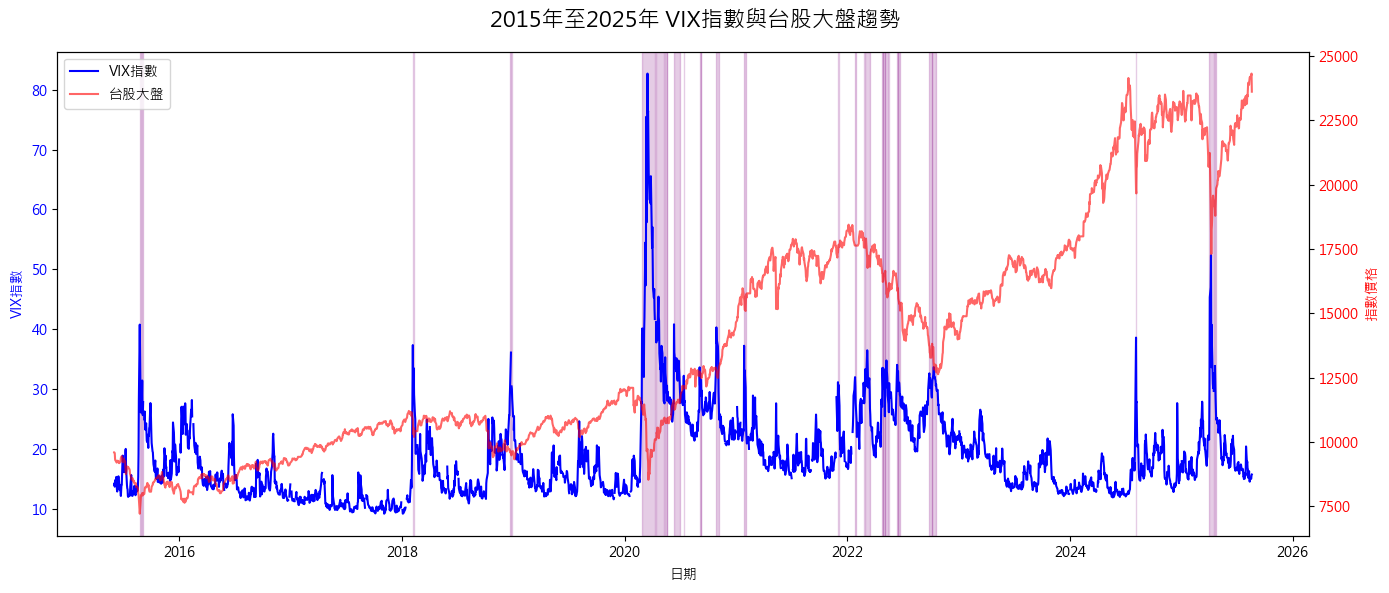

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

rcParams['font.family'] = 'Microsoft JhengHei'

# 設定時間範圍
start_date = '2015-06-01'
end_date = '2025-08-20'

# 篩選台股資料
index_filtered = df_index.loc[start_date:end_date]

# 建立圖形
fig, ax1 = plt.subplots(figsize=(14, 6))

# 左側 Y 軸：VIX 指數
ax1.plot(vix_data.index, vix_data['VIX_Close'], label='VIX指數', color='blue')
ax1.set_xlabel('日期')
ax1.set_ylabel('VIX指數', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 標示 VIX > 30 的區間
vix_high = vix_data['VIX_Close'] > 30
in_regime = False
start = None

for date, is_high in vix_high.items():
    if is_high and not in_regime:
        start = date
        in_regime = True
    elif not is_high and in_regime:
        end = date
        ax1.axvspan(start, end, color='purple', alpha=0.2)
        in_regime = False

# 若最後一段持續到結尾
if in_regime:
    end = vix_data.index[-1]
    ax1.axvspan(start, end, color='purple', alpha=0.2, label='VIX高於30')

# 右側 Y 軸：台股指數與期貨
ax2 = ax1.twinx()
ax2.plot(index_filtered.index, index_filtered['Close'], label='台股大盤', color='red', alpha=0.6)
ax2.set_ylabel('指數價格', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 標題與圖例
fig.suptitle('2015年至2025年 VIX指數與台股大盤趨勢', fontsize=16)

# 合併圖例
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
legend_dict = dict(zip(labels_1 + labels_2, lines_1 + lines_2))
ax1.legend(legend_dict.values(), legend_dict.keys(), loc='upper left')

plt.tight_layout()
plt.show()


#### 觀察CB市場與VIX之連動性

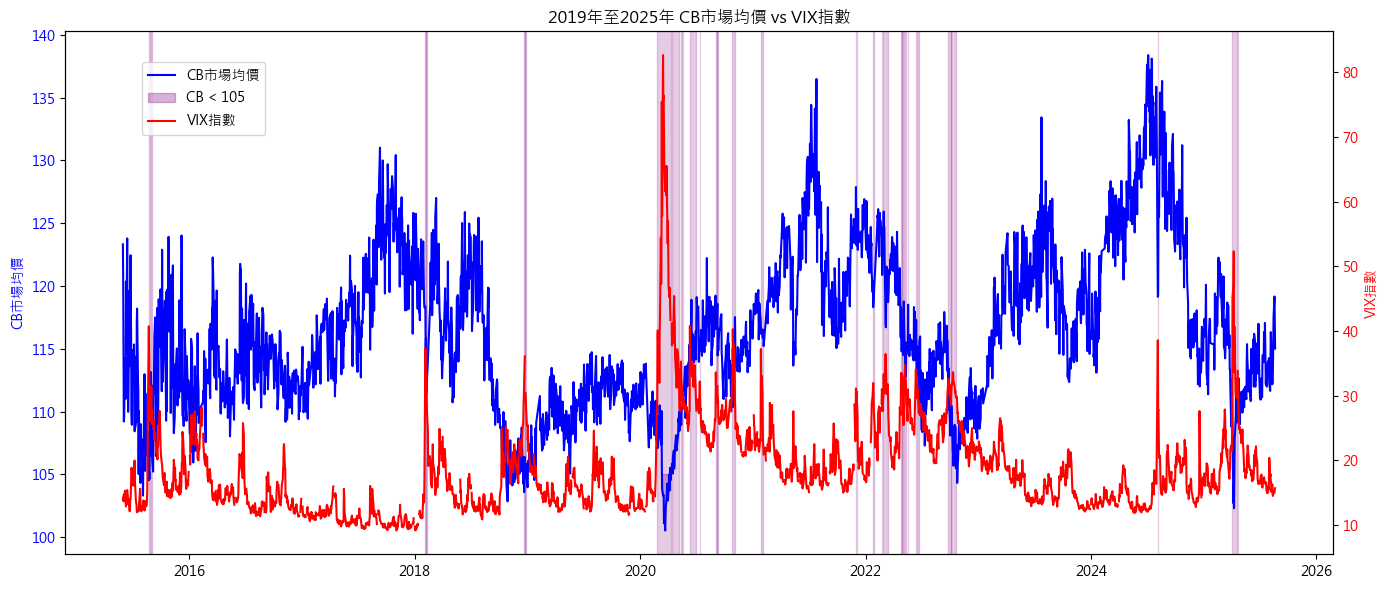

In [ ]:
# 建立圖表與雙 Y 軸
fig, ax1 = plt.subplots(figsize=(14, 6))

# 繪製 CB 市場均價（左側 Y 軸）
ax1.plot(cb_filtered.index, cb_filtered['Close_avg'], color='blue', label='CB市場均價')
ax1.set_ylabel('CB市場均價', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 標示 CB 價格低於 105 的區段
low_cb = cb_filtered['Close_avg'] < 105
ax1.fill_between(cb_filtered.index, cb_filtered['Close_avg'], 105, where=low_cb, color='purple', alpha=0.3, label='CB < 105')

# 建立第二個 Y 軸（右側）
ax2 = ax1.twinx()
ax2.plot(vix_data.index, vix_data['VIX_Close'], color='red', label='VIX指數')
ax2.set_ylabel('VIX指數', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 標示 VIX > 30 的區間
vix_high = vix_data['VIX_Close'] > 30
in_regime = False
start = None

for date, is_high in vix_high.items():
    if is_high and not in_regime:
        start = date
        in_regime = True
    elif not is_high and in_regime:
        end = date
        ax1.axvspan(start, end, color='purple', alpha=0.2)
        in_regime = False

# 若最後一段持續到結尾
if in_regime:
    end = vix_data.index[-1]
    ax1.axvspan(start, end, color='purple', alpha=0.2, label='VIX高於30')

plt.title('2019年至2025年 CB市場均價 vs VIX指數')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()
plt.show()


### 計算CB市場與台股大盤之相關性與同漲同跌之機率

幫我將cb_market、df_index中的close數值抓出來，並計算兩者之相關性

In [18]:
# 擷取 Close 欄位並重新命名
cb_close = cb_market[['Close_avg']].rename(columns={'Close_avg': 'cb_close'})
index_close = df_index[['Close']].rename(columns={'Close': 'index_close'})

cb_return = cb_close.pct_change().dropna()
index_return = index_close.pct_change().dropna()

# 合併並計算報酬率相關性
merged_return = pd.merge(cb_return, index_return, left_index=True, right_index=True, how='inner')
merged_return = merged_return.loc['2019-01-01':'2024-08-04']
correlation_return = merged_return['cb_close'].corr(merged_return['index_close'])

print(f"可轉債與台股指數的報酬率相關係數為：{correlation_return:.4f}")


可轉債與台股指數的報酬率相關係數為：0.2417


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 擷取 Close 欄位並重新命名
cb_close = cb_market[['Close_avg']].rename(columns={'Close_avg': 'cb_close'})
index_close = df_index[['Close']].rename(columns={'Close': 'index_close'})

# 計算每日報酬率
cb_return = cb_close.pct_change().dropna()
index_return = index_close.pct_change().dropna()

# 合併報酬率資料
merged_return = pd.merge(cb_return, index_return, left_index=True, right_index=True, how='inner')
merged_return = merged_return.loc['2019-01-01':'2024-08-04']

# 判斷方向：1 上漲、-1 下跌、0 持平
merged_return['cb_dir'] = merged_return['cb_close'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
merged_return['index_dir'] = merged_return['index_close'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

# 判斷方向一致性
merged_return['same_direction'] = (
    (merged_return['cb_dir'] == merged_return['index_dir']) & (merged_return['cb_dir'] != 0)
)
merged_return['opposite_direction'] = (
    (merged_return['cb_dir'] * merged_return['index_dir'] == -1)
)

# 統計機率
total_days = len(merged_return)
same_prob = merged_return['same_direction'].mean()
opposite_prob = merged_return['opposite_direction'].mean()
up_up_prob = ((merged_return['cb_dir'] == 1) & (merged_return['index_dir'] == 1)).mean()
down_down_prob = ((merged_return['cb_dir'] == -1) & (merged_return['index_dir'] == -1)).mean()

print(f"📈 同漲機率：{up_up_prob:.2%}")
print(f"📉 同跌機率：{down_down_prob:.2%}")
print(f"✅ 同漲同跌總機率：{same_prob:.2%}")
print(f"🔄 反向機率（一漲一跌）：{opposite_prob:.2%}")

📈 同漲機率：33.68%
📉 同跌機率：23.74%
✅ 同漲同跌總機率：57.42%
🔄 反向機率（一漲一跌）：42.58%


Spearman 相關係數為：0.2068


C:\Users\Psc.PT6202\AppData\Local\Temp\ipykernel_10172\3598915347.py:17: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  plt.tight_layout()
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


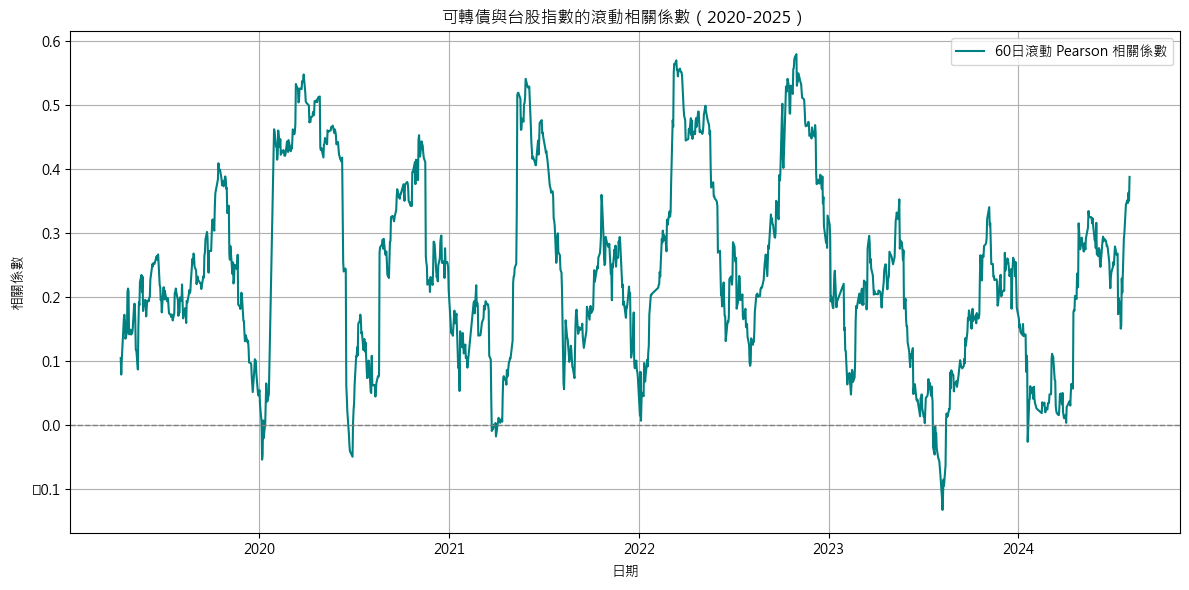

In [20]:
# 計算 Spearman 相關係數
spearman_corr = merged_return.corr(method='spearman').loc['cb_close', 'index_close']
print(f"Spearman 相關係數為：{spearman_corr:.4f}")

# 計算滾動 Pearson 相關係數（60 日）
rolling_corr = merged_return['cb_close'].rolling(window=60).corr(merged_return['index_close'])

# 繪製滾動相關係數圖
plt.figure(figsize=(12, 6))
plt.plot(rolling_corr, label='60日滾動 Pearson 相關係數', color='teal')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.title('可轉債與台股指數的滾動相關係數（2020-2025）')
plt.xlabel('日期')
plt.ylabel('相關係數')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

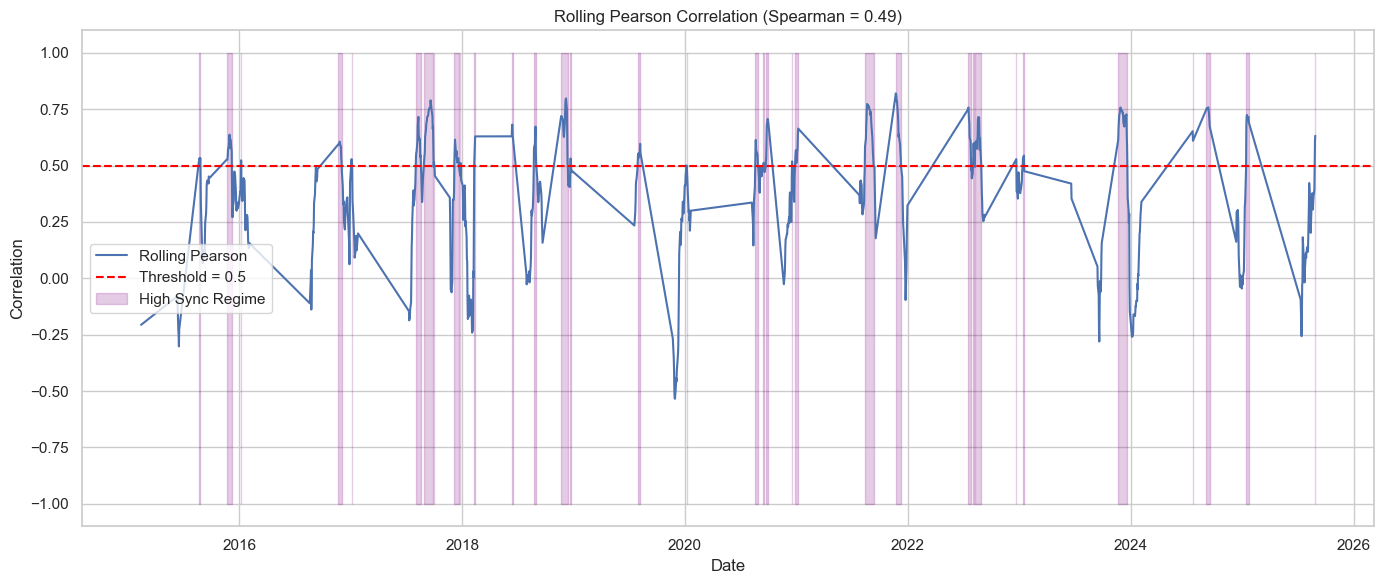

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# 假設 cb_market 和 df_index 是已對齊的 DataFrame，index 為日期
# 並且包含 'cb_market' 與 'df_index' 兩欄報酬率

# 計算 60 日滾動 Pearson 相關係數
window_size = 30
rolling_pearson = cb_close['cb_close'].rolling(window=window_size).corr(df_index['Close'])

# 合併資料，確保 index 對齊
merged = pd.merge(cb_close[['cb_close']], df_index[['Close']], left_index=True, right_index=True)

# 計算 Spearman 相關係數
# 只要方向一致 (漲跌相同)
spearman_corr, _ = spearmanr(merged['cb_close'], merged['Close'])

# 建立結果 DataFrame
result = pd.DataFrame({
    'cb_close': cb_close['cb_close'],
    'df_close': df_index['Close'],
    'rolling_pearson': rolling_pearson
})

# 判斷 regime：高同步性區間
result['regime'] = np.where((result['rolling_pearson'] > 0.5) & (spearman_corr > 0.3), 'High Sync', 'Low Sync')

# 畫圖
sns.set(style="whitegrid")
plt.figure(figsize=(14, 6))
sns.lineplot(x=result.index, y=result['rolling_pearson'], label='Rolling Pearson')
plt.axhline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.fill_between(result.index, 1, -1, where=result['regime'] == 'High Sync', color='purple', alpha=0.2, label='High Sync Regime')
plt.title(f"Rolling Pearson Correlation (Spearman = {spearman_corr:.2f})")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.legend()
plt.tight_layout()
plt.show()


### CB市場價格低於105占比對比台股大盤

自動略過 NaN 值

In [ ]:
def price_threshold_summary(df_close, threshold=105):
    """
    計算每日價格低於 threshold 的商品數量、總報價商品數量、佔比
    """
    # 建立布林矩陣：True 表示價格低於 threshold
    below_threshold = df_close < threshold

    # 每日低於 threshold 的商品數量
    count_below = below_threshold.sum(axis=1)

    # 每日有報價的商品總數（排除 NaN）
    count_total = df_close.notna().sum(axis=1)

    # 計算比例
    proportion = count_below / count_total

    # 整理成表格
    result_df = pd.DataFrame({
        f'低於 {threshold} 數量': count_below,
        '有報價商品數量': count_total,
        f'低於 {threshold} 佔比': proportion
    })

    return result_df

# 使用範例
cb_num_100 = price_threshold_summary(df_close, threshold=100)
cb_num_105 = price_threshold_summary(df_close, threshold=105)

cb_num_100.to_csv("U:\CB數據庫\CB與大盤連結策略\CB_100.csv", encoding="utf-8-sig")
cb_num_105.to_csv("U:\CB數據庫\CB與大盤連結策略\CB_105.csv", encoding="utf-8-sig")

<>:30: SyntaxWarning: invalid escape sequence '\C'
<>:31: SyntaxWarning: invalid escape sequence '\C'
<>:30: SyntaxWarning: invalid escape sequence '\C'
<>:31: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Psc.PT6202\AppData\Local\Temp\ipykernel_10172\590476139.py:30: SyntaxWarning: invalid escape sequence '\C'
  cb_num_100.to_csv("U:\CB數據庫\CB與大盤連結策略\CB_100.csv", encoding="utf-8-sig")
C:\Users\Psc.PT6202\AppData\Local\Temp\ipykernel_10172\590476139.py:31: SyntaxWarning: invalid escape sequence '\C'
  cb_num_105.to_csv("U:\CB數據庫\CB與大盤連結策略\CB_105.csv", encoding="utf-8-sig")


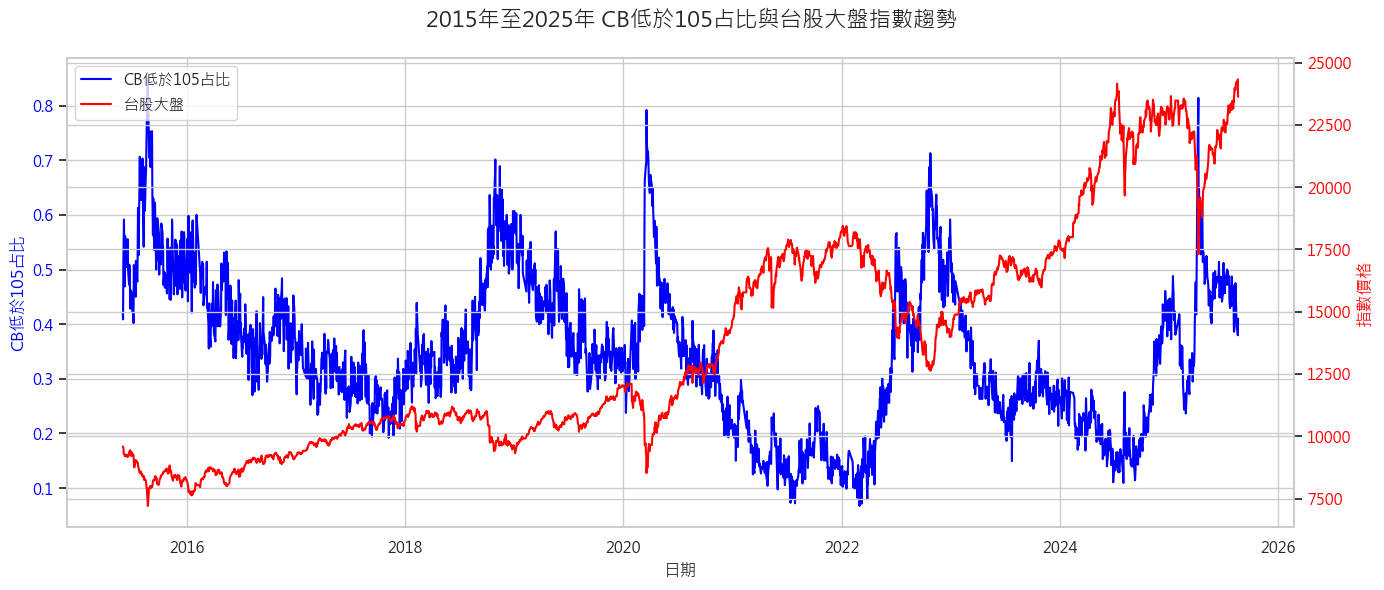

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import ticker as mtick
from matplotlib import rcParams

rcParams['font.family'] = 'Microsoft JhengHei'

# 設定日期範圍
start_date = '2015-06-01'
end_date = '2025-08-20'

# 篩選資料（透過 index）
cb_filtered = cb_num_105.loc[start_date:end_date]
index_filtered = df_index.loc[start_date:end_date]

# 建立圖形與主軸
fig, ax1 = plt.subplots(figsize=(14, 6))

# 左側 Y 軸：CB Market
ax1.plot(cb_filtered.index, cb_filtered['低於 105 佔比'], label='CB低於105占比', color='blue')
ax1.set_xlabel('日期')
ax1.set_ylabel('CB低於105占比', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 右側 Y 軸：Index
ax2 = ax1.twinx()
ax2.plot(index_filtered.index, index_filtered['Close'], label='台股大盤', color='red')
ax2.set_ylabel('指數價格', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 標題與圖例
fig.suptitle('2015年至2025年 CB低於105占比與台股大盤指數趨勢', fontsize=16)

# 合併圖例      
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()

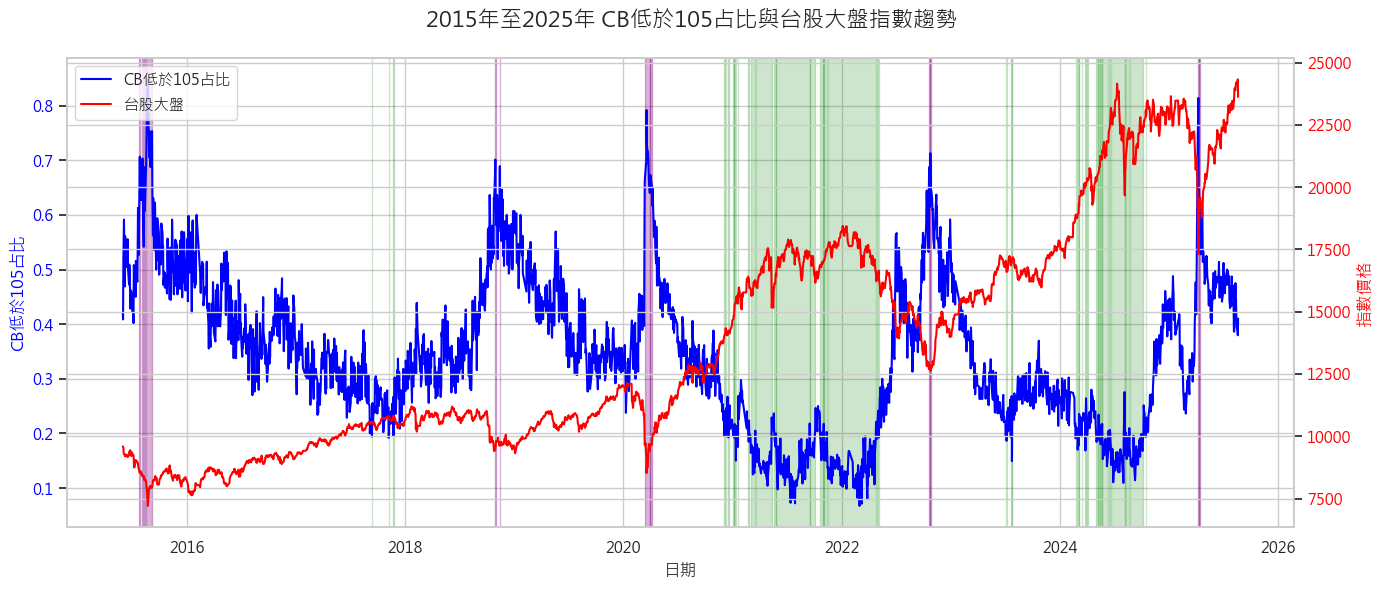

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import ticker as mtick
from matplotlib import rcParams

rcParams['font.family'] = 'Microsoft JhengHei'

# 設定日期範圍
start_date = '2015-06-01'
end_date = '2025-08-20'

# 篩選資料（透過 index）
cb_filtered = cb_num_105.loc[start_date:end_date]
index_filtered = df_index.loc[start_date:end_date]

# 建立圖形與主軸
fig, ax1 = plt.subplots(figsize=(14, 6))

# 左側 Y 軸：CB Market
ax1.plot(cb_filtered.index, cb_filtered['低於 105 佔比'], label='CB低於105占比', color='blue')
ax1.set_xlabel('日期')
ax1.set_ylabel('CB低於105占比', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 標示 CB低於105佔比 > 0.6 的區段（紫色）
threshold_high = 0.65
above_threshold = cb_filtered['低於 105 佔比'] > threshold_high
in_zone = False
zone_start = None

for i in range(len(cb_filtered)):
    if above_threshold.iloc[i] and not in_zone:
        zone_start = cb_filtered.index[i]
        in_zone = True
    elif not above_threshold.iloc[i] and in_zone:
        zone_end = cb_filtered.index[i]
        ax1.axvspan(zone_start, zone_end, color='purple', alpha=0.3)
        in_zone = False
if in_zone:
    zone_end = cb_filtered.index[-1]
    ax1.axvspan(zone_start, zone_end, color='purple', alpha=0.3)

# 標示 CB低於105佔比 < 0.15 的區段（綠色）
threshold_low = 0.2
below_threshold = cb_filtered['低於 105 佔比'] < threshold_low
in_zone = False
zone_start = None

for i in range(len(cb_filtered)):
    if below_threshold.iloc[i] and not in_zone:
        zone_start = cb_filtered.index[i]
        in_zone = True
    elif not below_threshold.iloc[i] and in_zone:
        zone_end = cb_filtered.index[i]
        ax1.axvspan(zone_start, zone_end, color='green', alpha=0.2)
        in_zone = False
if in_zone:
    zone_end = cb_filtered.index[-1]
    ax1.axvspan(zone_start, zone_end, color='green', alpha=0.2)

# 右側 Y 軸：Index
ax2 = ax1.twinx()
ax2.plot(index_filtered.index, index_filtered['Close'], label='台股大盤', color='red')
ax2.set_ylabel('指數價格', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 標題與圖例
fig.suptitle('2015年至2025年 CB低於105占比與台股大盤指數趨勢', fontsize=16)

# 合併圖例（兩個軸的線條）
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()


### 利用成交金額觀察CB市場流動性

#### 計算每日市場平均成交金額

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 設定日期範圍
start_date = '2015-06-01'
end_date = '2025-08-20'

cb_volume_filtered = cb_volume[start_date:end_date]
cb_volume_filtered.index = pd.to_datetime(cb_volume_filtered.index)

# 清理函數：移除逗號、空白，轉為數值
def clean_numeric(x):
    if isinstance(x, str):
        x = x.replace(',', '').strip()
    return pd.to_numeric(x, errors='coerce')

# 清理資料
cb_volume_cleaned = cb_volume_filtered.applymap(clean_numeric)

# 計算每日平均成交金額（忽略 NaN）
daily_avg_volume = cb_volume_cleaned.mean(axis=1)

# 計算五日均線
daily_avg_volume_ma5 = daily_avg_volume.rolling(window=5).mean()

# 建立每日 CB 市場摘要表格
cb_summary = pd.DataFrame({
    'CB數量': cb_volume_cleaned.count(axis=1),
    '累積成交金額': cb_volume_cleaned.sum(axis=1),
    '平均成交金額': daily_avg_volume,
    '平均成交金額_5日均線': daily_avg_volume_ma5,
    '高成交CB占比': cb_volume_cleaned.gt(5_000_000).sum(axis=1) / cb_volume_cleaned.count(axis=1)
})


cb_summary
cb_summary.to_csv('U:\CB數據庫\CB與大盤連結策略\CB市場成交金額.csv', encoding='utf-8-sig')

<>:41: SyntaxWarning: invalid escape sequence '\C'
<>:41: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Psc.PT6202\AppData\Local\Temp\ipykernel_10172\4202508713.py:41: SyntaxWarning: invalid escape sequence '\C'
  cb_summary.to_csv('U:\CB數據庫\CB與大盤連結策略\CB市場成交金額.csv', encoding='utf-8-sig')
C:\Users\Psc.PT6202\AppData\Local\Temp\ipykernel_10172\4202508713.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cb_volume_cleaned = cb_volume_filtered.applymap(clean_numeric)


In [28]:
cb_summary

,CB數量,累積成交金額,平均成交金額,平均成交金額_5日均線,高成交CB占比
日期,,,,,
2015-06-01,107,5.896013e+08,5.510293e+06,NaN,0.271028
2015-06-02,115,7.475242e+08,6.500211e+06,NaN,0.339130
2015-06-03,120,1.063682e+09,8.864013e+06,NaN,0.291667
2015-06-04,126,8.319275e+08,6.602599e+06,NaN,0.269841
2015-06-05,93,7.283788e+08,7.832030e+06,7.061829e+06,0.354839
...,...,...,...,...,...
2025-08-14,190,1.564426e+09,8.233823e+06,9.242968e+06,0.294737
2025-08-15,195,1.560784e+09,8.004020e+06,9.139249e+06,0.266667
2025-08-18,196,1.879724e+09,9.590431e+06,9.153862e+06,0.331633


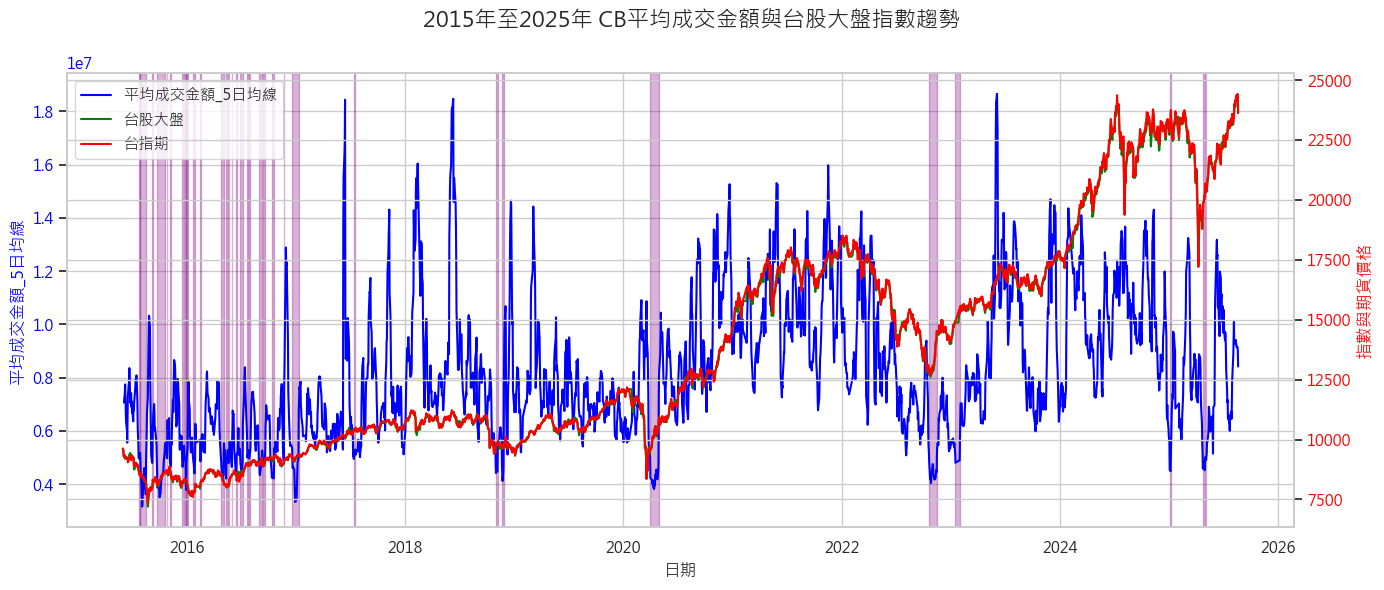

In [ ]:
# 建立圖形與主軸
fig, ax1 = plt.subplots(figsize=(14, 6))

# 左側 Y 軸：CB Market
ax1.plot(cb_summary.index, cb_summary['平均成交金額_5日均線'], label='平均成交金額_5日均線', color='blue')
ax1.set_xlabel('日期')
ax1.set_ylabel('平均成交金額_5日均線', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 標示
threshold = 5_000_000
above_threshold = cb_summary['平均成交金額_5日均線'] <= threshold
in_zone = False
zone_start = None

for i in range(len(cb_summary)):
    if above_threshold.iloc[i] and not in_zone:
        zone_start = cb_summary.index[i]
        in_zone = True
    elif not above_threshold.iloc[i] and in_zone:
        zone_end = cb_summary.index[i]
        ax1.axvspan(zone_start, zone_end, color='purple', alpha=0.3)
        in_zone = False

# 若最後一段仍在 regime 中，補上結尾
if in_zone:
    zone_end = cb_summary.index[-1]
    ax1.axvspan(zone_start, zone_end, color='purple', alpha=0.3)

# 右側 Y 軸：Index & Future
ax2 = ax1.twinx()
ax2.plot(index_filtered.index, index_filtered['Close'], label='台股大盤', color='green')
ax2.plot(future_filtered.index, future_filtered['Close'], label='台指期', color='red')
ax2.set_ylabel('指數與期貨價格', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 標題與圖例
fig.suptitle('2015年至2025年 CB平均成交金額與台股大盤指數趨勢', fontsize=16)

# 合併圖例（兩個軸的線條）
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()

#### 計算市場每日成交金額大於...之CB商品占比

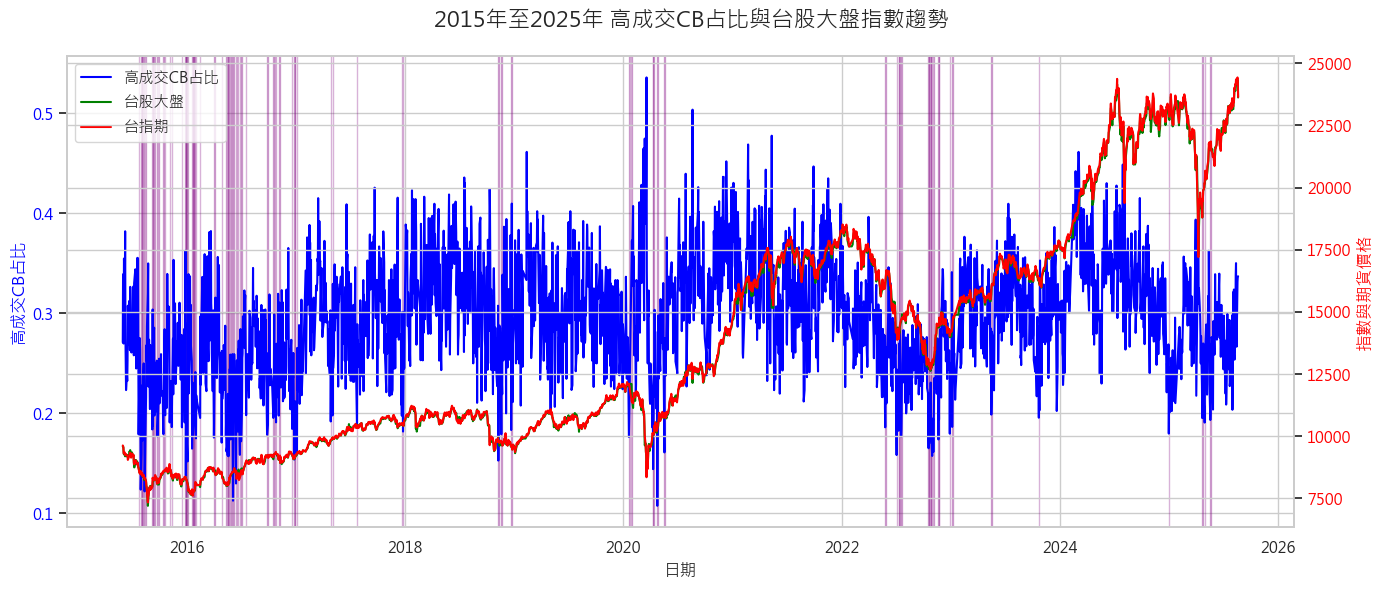

In [30]:
# 建立圖形與主軸
fig, ax1 = plt.subplots(figsize=(14, 6))

# 左側 Y 軸：CB Market
ax1.plot(cb_summary.index, cb_summary['高成交CB占比'], label='高成交CB占比', color='blue')
ax1.set_xlabel('日期')
ax1.set_ylabel('高成交CB占比', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 標示 CB低於105佔比 > 0.6 的區段（紫色）
threshold = 0.2
above_threshold = cb_summary['高成交CB占比'] < threshold
in_zone = False
zone_start = None

for i in range(len(cb_summary)):
    if above_threshold.iloc[i] and not in_zone:
        zone_start = cb_summary.index[i]
        in_zone = True
    elif not above_threshold.iloc[i] and in_zone:
        zone_end = cb_summary.index[i]
        ax1.axvspan(zone_start, zone_end, color='purple', alpha=0.3)
        in_zone = False

# 若最後一段仍在 regime 中，補上結尾
if in_zone:
    zone_end = cb_summary.index[-1]
    ax1.axvspan(zone_start, zone_end, color='purple', alpha=0.3)

# 右側 Y 軸：Index & Future
ax2 = ax1.twinx()
ax2.plot(index_filtered.index, index_filtered['Close'], label='台股大盤', color='green')
ax2.plot(future_filtered.index, future_filtered['Close'], label='台指期', color='red')
ax2.set_ylabel('指數與期貨價格', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 標題與圖例
fig.suptitle('2015年至2025年 高成交CB占比與台股大盤指數趨勢', fontsize=16)

# 合併圖例（兩個軸的線條）
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

# 儲存與顯示
plt.tight_layout()
plt.show()

### 策略

前置設定：
指標：CB低於105占比

賣點：該CB商品之最後一個有價格之交易日 / 指標小於0.15 / 一年，選擇三者之最短
(補充說明：由於近期買進(4/2)之股票可能還沒有達到賣點，所以會統一於數據之最後一天(8/20)出清)

最終產出以下資訊：
1. 策略績效 (須包含總交易筆數、平均報酬率(%)、總損益、總成本、總收入、勝率(%)、賺賠比) CB跟股票的都要有
(年化報酬、年化波動、最大回檔程度) 
2. 商品紀錄表 (包含CB商品代號、進場日、出場日、持有天數、進場價格、出場價格、報酬率、出場原因、觀察期之CB平均成交金額、CB流動性、股票價場價格、出場價格、報酬率、觀察期之股票平均成交金額、股票流動性、持有期間之CB/股票最高、最低價格與時間)
3. 每日持有商品變化圖
4. 最大回檔程度紀錄 (須包含進場日、進場大盤價格、最低點日期、大盤最低點價格、下行時間、下行幅度、站回進場點時間、大盤站回進場點價格、出場日、出場大盤價格、持有時間、整體績效)

以以上為架構，設計三種策略 (起始日為CB指標出現超過70%)
1. 起始日跌破...後5日站回
2. 起始日當日CB價格在...價格區間
3. 起始日當日CB價格在...價格之上

然後會同步觀察CB與股票的
1. CB 平均成交金額 > 5,000,000
2. 股票 平均成交金額 > 500,000,000

取聯集，主要是想觀察
1. CB可以股票不行 - 只做CB
2. CB不行股票可以 - 只做股票
3. CB跟股票都可以 - 個人選擇

#### 策略1：起始日跌破...後5日站回

買點：
指標超過70% (每次觸發只抓第一筆，若在接續3個月內，即使再次超過70%，也不再進場) 當作起始日，連續觀察5日，如果發生跌破...點位後在5日內站回的話，選擇以第5日收盤價進場

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

def cb_strategy_market(df_close, cb_filtered, df_index, stock_close, stock_volume,
                                     entry_threshold=0.7, exit_threshold=0.15,
                                     cooldown_days=90, observation_window = 1, price_threshold = 100):
    """
    可轉債策略模擬：
    - 根據「低於105佔比」判斷進場與出場時機
    - 篩選價格在合理區間的可轉債商品 
    - 記錄交易、持有期間、報酬率
    - 追蹤台股大盤在進場後的最大回檔與回復時間
    
    entry_threshold:進場門檻
    exit_thereshold:出場門檻
    price_min/max:可轉債價格篩選區間
    cooldown_days:進場冷卻期 (避免過度交易)
    """

    # 時間格式處理
    cb_filtered.index = pd.to_datetime(cb_filtered.index)
    df_close.index = pd.to_datetime(df_close.index)
    df_index.index = pd.to_datetime(df_index.index)
    stock_close.index = pd.to_datetime(stock_close.index)

    trades = [] # 儲存交易紀錄
    drawdowns = [] # 除存台股最大回檔紀錄
    daily_holding = pd.Series(0, index=df_close.index) # 每日持有商品數量
    last_entry_date = pd.Timestamp('1900-01-01') # 初始進場日設定
    used_entry_dates = set() # 用來排除重複進場日
    today = pd.Timestamp.today() # 捕捉今日日期
    recorded_cb_entries = set()

    # 逐日檢查是否符合進場條件
    for current_date in cb_filtered.index:
        # 若還在冷卻期則跳過
        if current_date < last_entry_date + timedelta(days=cooldown_days):
            continue
        # 若市場狀況不符合進場門檻則跳過
        if cb_filtered.loc[current_date, '低於 105 佔比'] < entry_threshold:
            continue
        if current_date not in df_close.index or current_date not in df_index.index:
            continue
        
        observation_dates = cb_filtered.loc[current_date:].index[:observation_window]

        # 取得當日所有CB商品的收盤價
        prices_today = df_close.loc[current_date]
        selected_cb = []

        for cb_code in prices_today.dropna().index:
            cb_series = df_close[cb_code].dropna()
            obs_prices = cb_series.reindex(observation_dates).dropna()

            if obs_prices.empty:
                continue

            # 新增：成交金額篩選條件
            cb_volume_series = cb_volume_cleaned[cb_code].dropna()
            obs_volume = cb_volume_series.reindex(observation_dates).dropna()

            # 找出第一次跌破的位置
            below_indices = obs_prices[obs_prices < price_threshold].index
            if not below_indices.empty:
                first_below_date = below_indices[0]

                # 從第一次跌破之後開始找是否有站回
                post_below_prices = obs_prices.loc[first_below_date:]
                above_indices = post_below_prices[post_below_prices >= price_threshold].index

                if not above_indices.empty:
                    first_above_date = above_indices[0]

                    # 確認站回之後都沒有再跌破
                    after_above_prices = obs_prices.loc[first_above_date:]
                    if (after_above_prices < price_threshold).sum() == 0:
                        entry_date = observation_dates[-1]
                        entry_price = cb_series.loc[entry_date] if entry_date in cb_series.index else None
                        cb_avg_volume = obs_volume.mean()
                        if entry_price is not None:
                            selected_cb.append((cb_code, entry_date, entry_price, cb_avg_volume))

        
        # 若無符合條件商品則跳過
        if not selected_cb:
            continue

        # 進場日紀錄，且挑選當日價格在合理區間之商品
        last_entry_date = current_date 
        index_entry = df_index.loc[current_date, 'Close'] # 紀錄台股大盤在進場日的點數
        
        # 檢查商品在進場日後是否仍存在交易日
        for cb_code, entry_date, entry_price ,cb_avg_volume in selected_cb:
            cb_series = df_close[cb_code].dropna()
            last_trade_date = cb_series.index.max() # 找出序列出最晚的日期
            if last_trade_date == current_date:
                continue

            cb_series_after_entry = cb_series[cb_series.index > current_date]
            if cb_series_after_entry.empty:
                continue

            # 商品最後交易日
            last_trade_date = cb_series.index.max()
            exit_reason_1 = '商品到期'

            # 指標小於 0.15 的日子（從 current_date 往後找）
            future_cb = cb_filtered.loc[current_date:]
            early_exit = future_cb[future_cb['低於 105 佔比'] <= exit_threshold]
            exit_by_indicator = early_exit.index[0] if not early_exit.empty else None
            exit_reason_2 = '指標觸發'

            # 若該日無報價，順延往後找最近有報價的日子
            if exit_by_indicator and (exit_by_indicator not in df_close.index or pd.isna(df_close.loc[exit_by_indicator, cb_code])):
                cb_series_future = cb_series[cb_series.index > exit_by_indicator]
                if not cb_series_future.empty:
                    exit_by_indicator = cb_series_future.index[0]

            # 一年後
            exit_by_year = entry_date + timedelta(days=365)
            exit_reason_3 = '持有一年'
            if exit_by_year not in df_close.index or pd.isna(df_close.loc[exit_by_year, cb_code]):
                cb_series_future = cb_series[cb_series.index > exit_by_year]
                if not cb_series_future.empty:
                    exit_by_year = cb_series_future.index[0]

            # 整合三個候選日與理由
            exit_candidates = {
                last_trade_date: exit_reason_1,
                exit_by_indicator: exit_reason_2,
                exit_by_year: exit_reason_3
            }
            exit_candidates = {d: r for d, r in exit_candidates.items() if d is not None}
            exit_date = min(exit_candidates.keys())
            exit_reason = exit_candidates[exit_date]

            # 最終確認出場日有報價，否則順延
            if exit_date not in df_close.index or pd.isna(df_close.loc[exit_date, cb_code]):
                cb_series_future = cb_series[cb_series.index > exit_date]
                if cb_series_future.empty:
                    continue
                exit_date = cb_series_future.index[0]
                exit_reason += '（順延）'

            exit_price = df_close.loc[exit_date, cb_code]

            
            holding_days = (exit_date - entry_date).days
            return_pct = (exit_price - entry_price) / entry_price

            # 股票代碼（前四碼）
            stock_code = cb_code[:4]

            # 股票價格與報酬率
            stock_entry_price = stock_close.loc[entry_date, stock_code] if stock_code in stock_close.columns and current_date in stock_close.index else None
            stock_exit_price = stock_close.loc[exit_date, stock_code] if stock_code in stock_close.columns and exit_date in stock_close.index else None
            stock_return_pct = None
            if pd.notna(stock_entry_price) and pd.notna(stock_exit_price):
                stock_return_pct = (stock_exit_price - stock_entry_price) / stock_entry_price * 100

            # 平均成交金額（觀察期）
            avg_volume = None
            if stock_code in stock_volume.columns:
                volume_series = stock_volume.loc[entry_date:exit_date, stock_code]
                avg_volume = volume_series.mean()
            
            # 抓 CB 最低/高價與日期
            cb_period = cb_series.loc[entry_date:exit_date]
            cb_lowest_price = cb_period.min()
            cb_lowest_date = cb_period.idxmin()
            cb_highest_price = cb_period.max()
            cb_highest_date = cb_period.idxmax()


            # 抓股票最低/高價與日期
            if stock_code in stock_close.columns:
                stock_series = stock_close[stock_code].dropna()
                stock_period = stock_series.loc[entry_date:exit_date]
                stock_lowest_price = stock_period.min()
                stock_lowest_date = stock_period.idxmin()
                stock_highest_price = stock_period.max()
                stock_highest_date = stock_period.idxmax()
            else:
                stock_lowest_price = None
                stock_lowest_date = None
                stock_highest_price = None
                stock_highest_date = None
            
            if (cb_code, entry_date) in recorded_cb_entries:
                continue

            # 判斷是否符合流動性條件（聯集）
            cb_liquid = cb_avg_volume > 5_000_000 if cb_avg_volume is not None else False
            stock_liquid = avg_volume > 500_000_000 if avg_volume is not None else False

            if not (cb_liquid or stock_liquid):
                continue  # 若都不符合，跳過記錄

            trades.append({
                '商品代號': cb_code,
                '進場日': entry_date,
                '出場日': exit_date,
                '持有天數': holding_days,
                '進場價格': entry_price,
                '出場價格': exit_price,
                '報酬率(%)': round(return_pct * 100, 2),
                '出場原因': exit_reason,
                'CB平均成交金額(觀察期)': round(cb_avg_volume, 2),
                'CB流動性達標': cb_liquid,
                '股票進場價格': round(stock_entry_price, 2) if pd.notna(stock_entry_price) else None,
                '股票出場價格': round(stock_exit_price, 2) if pd.notna(stock_exit_price) else None,
                '股票報酬率(%)': round(stock_return_pct, 2) if stock_return_pct is not None else None,
                '股票平均成交金額(觀察期)': round(avg_volume, 2) if avg_volume is not None else None,
                '股票流動性達標': stock_liquid,

                'CB最低價格日期': cb_lowest_date.strftime('%Y-%m-%d'),
                'CB最低價格': round(cb_lowest_price, 2),
                'CB最高價格日期': cb_highest_date.strftime('%Y-%m-%d'),
                'CB最高價格': round(cb_highest_price, 2),
                
                '股票最低價格日期': stock_lowest_date.strftime('%Y-%m-%d') if stock_lowest_date else None,
                '股票最低價格': round(stock_lowest_price, 2) if stock_lowest_price else None,
                '股票最高價格日期': stock_highest_date.strftime('%Y-%m-%d') if stock_highest_date else None,
                '股票最高價格': round(stock_highest_price, 2) if stock_highest_price else None
            })
            recorded_cb_entries.add((cb_code, entry_date))
            daily_holding.loc[current_date:exit_date] += 1

        # 台股大盤最大回檔追蹤（每筆交易後）
        if entry_date not in used_entry_dates:
            used_entry_dates.add(entry_date)

            # 台股進場點
            index_entry = df_index.loc[entry_date, 'Close'] if entry_date in df_index.index else None
            if index_entry is None:
                continue  # 若無大盤資料則跳過

            # 台股出場點（以 CB 出場日為準）
            index_exit = df_index.loc[exit_date, 'Close'] if exit_date in df_index.index else None

            # 半年內最低點
            half_year_later = entry_date + timedelta(days=180)
            index_future = df_index.loc[entry_date:half_year_later]
            if index_future.empty:
                continue  # 若無資料則跳過

            lowest_point = index_future['Close'].min()
            lowest_date = index_future['Close'].idxmin()
            drawdown_pct = (lowest_point - index_entry) / index_entry * 100

            # 從最低點開始找站回
            recovery = df_index.loc[lowest_date:]
            recovery_date = recovery[recovery['Close'] >= index_entry].index.min()
            recovery_days = (recovery_date - entry_date).days if pd.notna(recovery_date) else None
            recovery_point = df_index.loc[recovery_date, 'Close'] if pd.notna(recovery_date) else None

            # 整體績效（出場點與進場點的差距）
            overall_return = ((index_exit - index_entry) / index_entry * 100) if index_exit else None

            drawdowns.append({
                '進場日': entry_date.strftime('%Y-%m-%d'),
                '進場大盤點位': round(index_entry, 2),
                '最低點日期': lowest_date.strftime('%Y-%m-%d'),
                '最低點大盤點位': round(lowest_point, 2),
                '下行時間': (lowest_date - entry_date).days,
                '下行幅度(%)': round(drawdown_pct, 2),
                '站回進場點時間': recovery_days,
                '站回進場點日期': recovery_date.strftime('%Y-%m-%d') if pd.notna(recovery_date) else None,
                '站回進場點大盤點位': round(recovery_point, 2) if recovery_point else None,
                '出場日': exit_date.strftime('%Y-%m-%d'),
                '出場大盤點位': round(index_exit, 2) if index_exit else None,
                '持有時間': (exit_date - entry_date).days,
                '整體績效(%)': round(overall_return, 2) if overall_return else None
            })

    # 商品紀錄表
    trades_df = pd.DataFrame(trades)
    trades_df.to_csv("U:\CB數據庫\CB與大盤連結策略\商品紀錄表1.csv", encoding="utf-8-sig", index=False)

    # 最大回檔紀錄表
    drawdown_df = pd.DataFrame(drawdowns)
    drawdown_df.to_csv("U:\CB數據庫\CB與大盤連結策略\大盤數據與回檔1.csv", encoding="utf-8-sig", index=False)

    # 策略績效報告
    total_trades = len(trades_df)
    avg_return = trades_df['報酬率(%)'].mean()
    total_profit = 1000*(trades_df['出場價格'] - trades_df['進場價格']).sum()
    total_cost = 1000*trades_df['進場價格'].sum()
    total_revenue = 1000*trades_df['出場價格'].sum()
    win_rate = len(trades_df[trades_df['報酬率(%)'] > 0]) / total_trades * 100 if total_trades > 0 else 0
    avg_gain = trades_df[trades_df['報酬率(%)'] > 0]['報酬率(%)'].mean()
    avg_loss = abs(trades_df[trades_df['報酬率(%)'] < 0]['報酬率(%)'].mean())
    profit_ratio = avg_gain / avg_loss if avg_loss > 0 else None

    # 股票績效計算
    total_trades_stock = len(trades_df)
    avg_return_stock = trades_df['股票報酬率(%)'].mean()
    total_profit_stock = 1000*(trades_df['股票出場價格'] - trades_df['股票進場價格']).sum()
    total_cost_stock = 1000*trades_df['股票進場價格'].sum()
    total_revenue_stock = 1000*trades_df['股票出場價格'].sum()
    win_rate_stock = len(trades_df[trades_df['股票報酬率(%)'] > 0]) / total_trades_stock * 100 if total_trades_stock > 0 else 0
    avg_gain_stock = trades_df[trades_df['股票報酬率(%)'] > 0]['股票報酬率(%)'].mean()
    avg_loss_stock = abs(trades_df[trades_df['股票報酬率(%)'] < 0]['股票報酬率(%)'].mean())
    profit_ratio_stock = avg_gain_stock / avg_loss_stock if avg_loss_stock > 0 else None
    
    print(f"\n📈 CB策略績效報告 (起始點跌破{price_threshold}後{observation_window}日站回)\n")
    print(f"總交易筆數：{total_trades}")
    print(f"平均報酬率(%)：{round(avg_return, 2)}")
    print(f"總損益：{round(total_profit, 2)}")
    print(f"總成本：{round(total_cost, 2)}")
    print(f"總收入：{round(total_revenue, 2)}")
    print(f"勝率(%)：{round(win_rate, 2)}")
    print(f"賺賠比：{round(profit_ratio, 2) if profit_ratio else '無法計算'}")

    print("\n📈 股票策略績效報告\n")
    print(f"總交易筆數：{total_trades_stock}")
    print(f"平均報酬率(%)：{round(avg_return_stock, 2)}")
    print(f"總損益：{round(total_profit_stock, 2)}")
    print(f"總成本：{round(total_cost_stock, 2)}")
    print(f"總收入：{round(total_revenue_stock, 2)}")
    print(f"勝率(%)：{round(win_rate_stock, 2)}")
    print(f"賺賠比：{round(profit_ratio_stock, 2) if profit_ratio_stock else '無法計算'}")

    # 每日持有商品數量圖
    plot_start = pd.to_datetime("2015-06-01")
    daily_holding_plot = daily_holding.loc[plot_start:]
    plt.figure(figsize=(12, 5))
    daily_holding_plot.plot(color='steelblue')
    for entry_date in trades_df['進場日'].drop_duplicates():
        if entry_date >= plot_start:
            plt.axvline(entry_date, color='red', linestyle='--', alpha=0.5)
            plt.text(entry_date, daily_holding_plot.min() - 0.5,
                 entry_date.strftime('%Y-%m-%d'),
                 rotation=0, color='red', fontsize=14, ha='center', va='top')

    plt.title("每日持有商品數量")
    plt.ylabel("持有張數")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    return trades_df, drawdown_df

<>:279: SyntaxWarning: invalid escape sequence '\C'
<>:283: SyntaxWarning: invalid escape sequence '\C'
<>:279: SyntaxWarning: invalid escape sequence '\C'
<>:283: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Psc.PT6202\AppData\Local\Temp\ipykernel_10172\2093635702.py:279: SyntaxWarning: invalid escape sequence '\C'
  trades_df.to_csv("U:\CB數據庫\CB與大盤連結策略\商品紀錄表1.csv", encoding="utf-8-sig", index=False)
C:\Users\Psc.PT6202\AppData\Local\Temp\ipykernel_10172\2093635702.py:283: SyntaxWarning: invalid escape sequence '\C'
  drawdown_df.to_csv("U:\CB數據庫\CB與大盤連結策略\大盤數據與回檔1.csv", encoding="utf-8-sig", index=False)



📈 CB策略績效報告 (起始點跌破105後5日站回)

總交易筆數：20
平均報酬率(%)：38.12
總損益：823250.0
總成本：2157500.0
總收入：2980750.0
勝率(%)：95.0
賺賠比：60.84

📈 股票策略績效報告

總交易筆數：20
平均報酬率(%)：70.79
總損益：2231480.0
總成本：2685330.0
總收入：4916810.0
勝率(%)：80.0
賺賠比：17.71


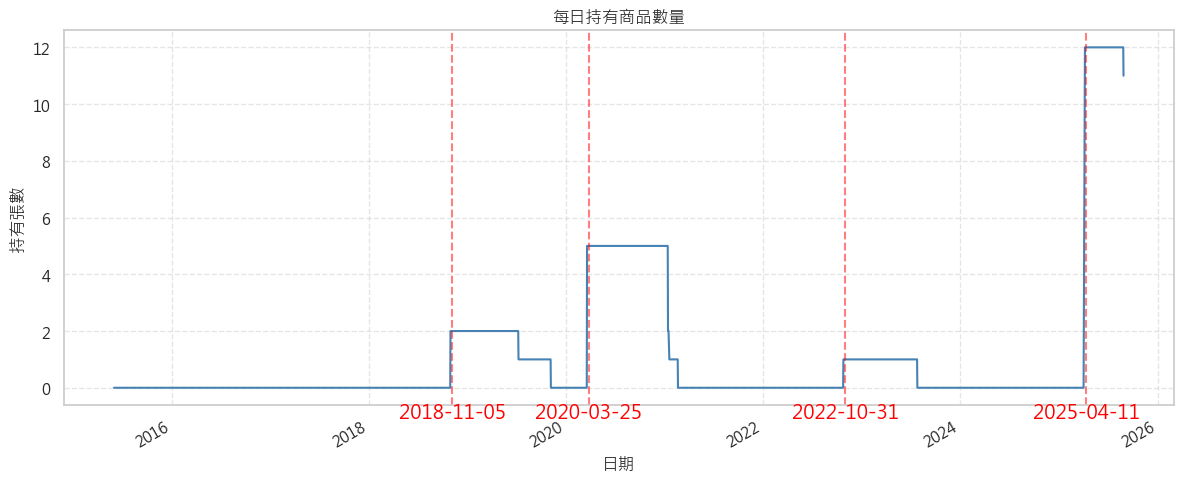

In [32]:
trades_df, drawdown_df = cb_strategy_market(
    df_close=df_close,
    cb_filtered=cb_filtered,
    df_index=df_index,
    stock_close=stock_close,
    stock_volume=stock_volume,
    entry_threshold=0.7,
    exit_threshold=0.15,
    cooldown_days=90,
    observation_window = 5, 
    price_threshold = 105
)

In [ ]:
import pandas as pd
import numpy as np

trades_df['進場日'] = pd.to_datetime(trades_df['進場日'])
trades_df['出場日'] = pd.to_datetime(trades_df['出場日'])

# 商品代號清理
trades_df['商品代號_clean'] = trades_df['商品代號'].str.extract(r'(\d+)')[0].str[:4]

def get_trade_returns(code, entry_date, exit_date, price_df):
    try:
        prices = price_df[code].loc[entry_date:exit_date].dropna()
        daily_returns = prices.pct_change().dropna()
        return daily_returns
    except:
        return pd.Series(dtype='float64')

# 建立 portfolio 報酬率序列
portfolio_returns = pd.Series(dtype='float64')

for _, row in trades_df.iterrows():
    code = row['商品代號_clean']
    entry = row['進場日']
    exit = row['出場日']
    daily_ret = get_trade_returns(code, entry, exit, stock_close)
    
    # 合併報酬率
    portfolio_returns = portfolio_returns.add(daily_ret, fill_value=0)

# 若有重疊天數，需平均
portfolio_returns = portfolio_returns / trades_df.shape[0]

def annualized_return(daily_returns):
    return (np.prod(1 + daily_returns)) ** (252 / len(daily_returns)) - 1

def annualized_volatility(daily_returns):
    return np.std(daily_returns) * np.sqrt(252)

def max_drawdown(daily_returns):
    cumulative = (1 + daily_returns).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()

def sharpe_ratio(daily_returns, risk_free_rate=0.01):
    ar = annualized_return(daily_returns)
    av = annualized_volatility(daily_returns)
    return (ar - risk_free_rate) / av

result = {
    '年化報酬率 (%)': round(annualized_return(portfolio_returns) * 100, 2),
    '年化波動度 (%)': round(annualized_volatility(portfolio_returns) * 100, 2),
    '最大回檔 (%)': round(max_drawdown(portfolio_returns) * 100, 2),
    '夏普比率': round(sharpe_ratio(portfolio_returns), 2)
}

print(pd.Series(result))


年化報酬率 (%)    17.71
年化波動度 (%)     6.49
最大回檔 (%)     -4.12
夏普比率          2.58
dtype: float64


#### 策略2：價格區間

買點：
指標超過70% (每次觸發只抓第一筆，若在接續3個月內，即使再次超過70%，也不再進場) 當作起始日，買進當日在價格區間之CB

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

def cb_strategy_market(df_close, cb_filtered, df_index, stock_close, stock_volume, cb_volume_cleaned,
                                     entry_threshold=0.7, exit_threshold=0.15,
                                     price_min=100, price_max=110, cooldown_days=90, observation_window = 1):
    """
    可轉債策略模擬：
    - 根據「低於105佔比」判斷進場與出場時機
    - 篩選價格在合理區間的可轉債商品 
    - 記錄交易、持有期間、報酬率
    - 追蹤台股大盤在進場後的最大回檔與回復時間
    
    entry_threshold:進場門檻
    exit_thereshold:出場門檻
    price_min/max:可轉債價格篩選區間
    cooldown_days:進場冷卻期 (避免過度交易)
    """

    # 時間格式處理
    cb_filtered.index = pd.to_datetime(cb_filtered.index)
    df_close.index = pd.to_datetime(df_close.index)
    cb_volume_cleaned.index = pd.to_datetime(cb_volume_cleaned.index)
    df_index.index = pd.to_datetime(df_index.index)
    stock_close.index = pd.to_datetime(stock_close.index)

    trades = [] # 儲存交易紀錄
    drawdowns = [] # 除存台股最大回檔紀錄
    daily_holding = pd.Series(0, index=df_close.index) # 每日持有商品數量
    last_entry_date = pd.Timestamp('1900-01-01') # 初始進場日設定
    used_entry_dates = set() # 用來排除重複進場日
    today = pd.Timestamp.today() # 捕捉今日日期
    recorded_cb_entries = set()

    # 逐日檢查是否符合進場條件
    for current_date in cb_filtered.index:
        # 若還在冷卻期則跳過
        if current_date < last_entry_date + timedelta(days=cooldown_days):
            continue
        # 若市場狀況不符合進場門檻則跳過
        if cb_filtered.loc[current_date, '低於 105 佔比'] < entry_threshold:
            continue
        if current_date not in df_close.index or current_date not in df_index.index:
            continue

        observation_dates = cb_filtered.loc[current_date:].index[:observation_window]
        
        prices_today = df_close.loc[current_date]
        selected_cb = []

        for cb_code in prices_today.dropna().index:
            entry_price = prices_today[cb_code]

            # 價格區間判斷
            if entry_price < price_min or entry_price > price_max:
                continue

            # 新增：成交金額篩選條件
            cb_volume_series = cb_volume_cleaned[cb_code].dropna()
            obs_volume = cb_volume_series.reindex(observation_dates).dropna()
            cb_avg_volume = obs_volume.mean()

            # 符合條件，記錄進場
            selected_cb.append((cb_code, current_date, entry_price, cb_avg_volume))

        
        # 若無符合條件商品則跳過
        if not selected_cb:
            continue

        # 進場日紀錄，且挑選當日價格在合理區間之商品
        last_entry_date = current_date 
        index_entry = df_index.loc[current_date, 'Close'] # 紀錄台股大盤在進場日的點數
        
        # 檢查商品在進場日後是否仍存在交易日
        for cb_code, entry_date, entry_price, cb_avg_volume in selected_cb:
            cb_series = df_close[cb_code].dropna()
            last_trade_date = cb_series.index.max() # 找出序列出最晚的日期
            if last_trade_date == current_date:
                continue

            cb_series_after_entry = cb_series[cb_series.index > current_date]
            if cb_series_after_entry.empty:
                continue

            # 商品最後交易日
            last_trade_date = cb_series.index.max()
            exit_reason_1 = '商品到期'

            # 指標小於 0.15 的日子（從 current_date 往後找）
            future_cb = cb_filtered.loc[current_date:]
            early_exit = future_cb[future_cb['低於 105 佔比'] <= exit_threshold]
            exit_by_indicator = early_exit.index[0] if not early_exit.empty else None
            exit_reason_2 = '指標觸發'

            # 若該日無報價，順延往後找最近有報價的日子
            if exit_by_indicator and (exit_by_indicator not in df_close.index or pd.isna(df_close.loc[exit_by_indicator, cb_code])):
                cb_series_future = cb_series[cb_series.index > exit_by_indicator]
                if not cb_series_future.empty:
                    exit_by_indicator = cb_series_future.index[0]

            # 一年後
            exit_by_year = entry_date + timedelta(days=365)
            exit_reason_3 = '持有一年'
            if exit_by_year not in df_close.index or pd.isna(df_close.loc[exit_by_year, cb_code]):
                cb_series_future = cb_series[cb_series.index > exit_by_year]
                if not cb_series_future.empty:
                    exit_by_year = cb_series_future.index[0]

            # 整合三個候選日與理由
            exit_candidates = {
                last_trade_date: exit_reason_1,
                exit_by_indicator: exit_reason_2,
                exit_by_year: exit_reason_3
            }
            exit_candidates = {d: r for d, r in exit_candidates.items() if d is not None}
            exit_date = min(exit_candidates.keys())
            exit_reason = exit_candidates[exit_date]

            # 最終確認出場日有報價，否則順延
            if exit_date not in df_close.index or pd.isna(df_close.loc[exit_date, cb_code]):
                cb_series_future = cb_series[cb_series.index > exit_date]
                if cb_series_future.empty:
                    continue
                exit_date = cb_series_future.index[0]
                exit_reason += '（順延）'

            exit_price = df_close.loc[exit_date, cb_code]

            
            holding_days = (exit_date - entry_date).days
            return_pct = (exit_price - entry_price) / entry_price

            # 股票代碼（前四碼）
            stock_code = cb_code[:4]

            # 股票價格與報酬率
            stock_entry_price = stock_close.loc[entry_date, stock_code] if stock_code in stock_close.columns and current_date in stock_close.index else None
            stock_exit_price = stock_close.loc[exit_date, stock_code] if stock_code in stock_close.columns and exit_date in stock_close.index else None
            stock_return_pct = None
            if pd.notna(stock_entry_price) and pd.notna(stock_exit_price):
                stock_return_pct = (stock_exit_price - stock_entry_price) / stock_entry_price * 100
            
            # 平均成交金額（觀察期）
            avg_volume = None
            if stock_code in stock_volume.columns:
                volume_series = stock_volume.loc[entry_date:exit_date, stock_code]
                avg_volume = volume_series.mean()

            # 抓 CB 最低/高價與日期
            cb_period = cb_series.loc[entry_date:exit_date]
            cb_lowest_price = cb_period.min()
            cb_lowest_date = cb_period.idxmin()
            cb_highest_price = cb_period.max()
            cb_highest_date = cb_period.idxmax()


            # 抓股票最低/高價與日期
            if stock_code in stock_close.columns:
                stock_series = stock_close[stock_code].dropna()
                stock_period = stock_series.loc[entry_date:exit_date]

                if not stock_period.empty:
                    stock_lowest_price = stock_period.min()
                    stock_lowest_date = stock_period.idxmin()
                    stock_highest_price = stock_period.max()
                    stock_highest_date = stock_period.idxmax()
                else:
                    stock_lowest_price = None
                    stock_lowest_date = None
                    stock_highest_price = None
                    stock_highest_date = None
            else:
                stock_lowest_price = None
                stock_lowest_date = None
                stock_highest_price = None  # 修正 typo
                stock_highest_date = None
            
            if (cb_code, entry_date) in recorded_cb_entries:
                continue

            # 判斷是否符合流動性條件（聯集）
            cb_liquid = cb_avg_volume > 5_000_000 if cb_avg_volume is not None else False
            stock_liquid = avg_volume > 500_000_000 if avg_volume is not None else False

            if not (cb_liquid or stock_liquid):
                continue  # 若都不符合，跳過記錄

            trades.append({
                '商品代號': cb_code,
                '進場日': entry_date,
                '出場日': exit_date,
                '持有天數': holding_days,
                '進場價格': entry_price,
                '出場價格': exit_price,
                '報酬率(%)': round(return_pct * 100, 2),
                '出場原因': exit_reason,
                'CB平均成交金額(觀察期)': round(cb_avg_volume, 2),
                'CB流動性達標': cb_liquid,
                '股票進場價格': round(stock_entry_price, 2) if pd.notna(stock_entry_price) else None,
                '股票出場價格': round(stock_exit_price, 2) if pd.notna(stock_exit_price) else None,
                '股票報酬率(%)': round(stock_return_pct, 2) if stock_return_pct is not None else None,
                '股票平均成交金額(觀察期)': round(avg_volume, 2) if avg_volume is not None else None,
                '股票流動性達標': stock_liquid,

                'CB最低價格日期': cb_lowest_date.strftime('%Y-%m-%d'),
                'CB最低價格': round(cb_lowest_price, 2),
                'CB最高價格日期': cb_highest_date.strftime('%Y-%m-%d'),
                'CB最高價格': round(cb_highest_price, 2),
                
                '股票最低價格日期': stock_lowest_date.strftime('%Y-%m-%d') if stock_lowest_date else None,
                '股票最低價格': round(stock_lowest_price, 2) if stock_lowest_price else None,
                '股票最高價格日期': stock_highest_date.strftime('%Y-%m-%d') if stock_highest_date else None,
                '股票最高價格': round(stock_highest_price, 2) if stock_highest_price else None,
            })
            recorded_cb_entries.add((cb_code, entry_date))
            daily_holding.loc[current_date:exit_date] += 1

        # 台股大盤最大回檔追蹤（排除重複進場日）
        if current_date not in used_entry_dates:
            used_entry_dates.add(current_date)

            entry_date = current_date
            future_data = cb_filtered.loc[entry_date + timedelta(days=1):]
            exit_candidates = future_data[future_data['低於 105 佔比'] <= exit_threshold]
            exit_date = exit_candidates.index.min() if not exit_candidates.empty else None
            holding_days = (exit_date if exit_date else today) - entry_date
            last_entry_date = entry_date

            # 台股大盤進場點
            index_entry = df_index.loc[entry_date, 'Close']
            # 台股大盤出場點
            index_exit = df_index.loc[exit_date, 'Close'] if exit_date and exit_date in df_index.index else None

            # 台股最大回檔追蹤（半年）
            half_year_later = entry_date + timedelta(days=180)
            index_future = df_index.loc[entry_date:half_year_later]
            lowest_point = index_future['Close'].min()
            lowest_date = index_future['Close'].idxmin()
            drawdown_pct = (lowest_point - index_entry) / index_entry * 100
            recovery = df_index.loc[lowest_date:]
            recovery_date = recovery[recovery['Close'] >= index_entry].index.min()
            recovery_days = (recovery_date - entry_date).days if pd.notna(recovery_date) else None
            recovery_point = df_index.loc[recovery_date, 'Close'] if pd.notna(recovery_date) else None

            # 整體績效（出場點與進場點的差距）
            overall_return = ((index_exit - index_entry) / index_entry * 100) if index_exit else None

            drawdowns.append({
                '進場日': entry_date.strftime('%Y-%m-%d'),
                '進場大盤點位': round(index_entry, 2),
                '最低點日期': lowest_date.strftime('%Y-%m-%d'),
                '最低點大盤點位': round(lowest_point, 2),
                '下行時間': (lowest_date - entry_date).days,
                '下行幅度(%)': round(drawdown_pct, 2),
                '站回進場點時間': recovery_days,
                '站回進場點日期': recovery_date.strftime('%Y-%m-%d') if pd.notna(recovery_date) else None,
                '站回進場點大盤點位': round(recovery_point, 2) if recovery_point else None,
                '出場日': exit_date.strftime('%Y-%m-%d') if exit_date else None,
                '出場大盤點位': round(index_exit, 2) if index_exit else None,
                '持有時間': holding_days.days,
                '整體績效(%)': round(overall_return, 2) if overall_return else None
            })

    # 商品紀錄表
    trades_df = pd.DataFrame(trades)
    trades_df.to_csv("U:\CB數據庫\CB與大盤連結策略\商品紀錄表2.csv", encoding="utf-8-sig", index=False)

    # 最大回檔紀錄表
    drawdown_df = pd.DataFrame(drawdowns)
    drawdown_df.to_csv("U:\CB數據庫\CB與大盤連結策略\大盤數據與回檔2.csv", encoding="utf-8-sig", index=False)


    # 策略績效報告
    total_trades = len(trades_df)
    avg_return = trades_df['報酬率(%)'].mean()
    total_profit = 1000*(trades_df['出場價格'] - trades_df['進場價格']).sum()
    total_cost = 1000*trades_df['進場價格'].sum()
    total_revenue = 1000*trades_df['出場價格'].sum()
    win_rate = len(trades_df[trades_df['報酬率(%)'] > 0]) / total_trades * 100 if total_trades > 0 else 0
    avg_gain = trades_df[trades_df['報酬率(%)'] > 0]['報酬率(%)'].mean()
    avg_loss = abs(trades_df[trades_df['報酬率(%)'] < 0]['報酬率(%)'].mean())
    profit_ratio = avg_gain / avg_loss if avg_loss > 0 else None

    # 股票績效計算
    total_trades_stock = len(trades_df)
    avg_return_stock = trades_df['股票報酬率(%)'].mean()
    total_profit_stock = 1000*(trades_df['股票出場價格'] - trades_df['股票進場價格']).sum()
    total_cost_stock = 1000*trades_df['股票進場價格'].sum()
    total_revenue_stock = 1000*trades_df['股票出場價格'].sum()
    win_rate_stock = len(trades_df[trades_df['股票報酬率(%)'] > 0]) / total_trades_stock * 100 if total_trades_stock > 0 else 0
    avg_gain_stock = trades_df[trades_df['股票報酬率(%)'] > 0]['股票報酬率(%)'].mean()
    avg_loss_stock = abs(trades_df[trades_df['股票報酬率(%)'] < 0]['股票報酬率(%)'].mean())
    profit_ratio_stock = avg_gain_stock / avg_loss_stock if avg_loss_stock > 0 else None
    
    print(f"\n📈 CB策略績效報告\n")
    print(f"總交易筆數：{total_trades}")
    print(f"平均報酬率(%)：{round(avg_return, 2)}")
    print(f"總損益：{round(total_profit, 2):,}")
    print(f"總成本：{round(total_cost, 2):,}")
    print(f"總收入：{round(total_revenue, 2):,}")
    print(f"勝率(%)：{round(win_rate, 2)}")
    print(f"賺賠比：{round(profit_ratio, 2) if profit_ratio else '無法計算'}")

    print("\n📈 股票績效報告\n")
    print(f"總交易筆數：{total_trades_stock}")
    print(f"平均報酬率(%)：{round(avg_return_stock, 2)}")
    print(f"總損益：{round(total_profit_stock, 2):,}")
    print(f"總成本：{round(total_cost_stock, 2):,}")
    print(f"總收入：{round(total_revenue_stock, 2):,}")
    print(f"勝率(%)：{round(win_rate_stock, 2)}")
    print(f"賺賠比：{round(profit_ratio_stock, 2) if profit_ratio_stock else '無法計算'}")

    # 每日持有商品數量圖
    plot_start = pd.to_datetime("2015-06-01")
    daily_holding_plot = daily_holding.loc[plot_start:]
    plt.figure(figsize=(12, 5))
    daily_holding_plot.plot(color='steelblue')
    for entry_date in trades_df['進場日'].drop_duplicates():
        if entry_date >= plot_start:
            plt.axvline(entry_date, color='red', linestyle='--', alpha=0.5)
            plt.text(entry_date, daily_holding_plot.min() - 0.5,
                 entry_date.strftime('%Y-%m-%d'),
                 rotation=0, color='red', fontsize=14, ha='center', va='top')

    plt.title("每日持有商品數量")
    plt.ylabel("持有張數")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    return trades_df, drawdown_df

<>:268: SyntaxWarning: invalid escape sequence '\C'
<>:272: SyntaxWarning: invalid escape sequence '\C'
<>:268: SyntaxWarning: invalid escape sequence '\C'
<>:272: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Psc.PT6202\AppData\Local\Temp\ipykernel_10172\1575510847.py:268: SyntaxWarning: invalid escape sequence '\C'
  trades_df.to_csv("U:\CB數據庫\CB與大盤連結策略\商品紀錄表2.csv", encoding="utf-8-sig", index=False)
C:\Users\Psc.PT6202\AppData\Local\Temp\ipykernel_10172\1575510847.py:272: SyntaxWarning: invalid escape sequence '\C'
  drawdown_df.to_csv("U:\CB數據庫\CB與大盤連結策略\大盤數據與回檔2.csv", encoding="utf-8-sig", index=False)



📈 CB策略績效報告

總交易筆數：115
平均報酬率(%)：31.74
總損益：3,819,900.0
總成本：11,901,400.0
總收入：15,721,300.0
勝率(%)：85.22
賺賠比：18.71

📈 股票績效報告

總交易筆數：115
平均報酬率(%)：63.45
總損益：5,804,040.0
總成本：9,009,880.0
總收入：14,813,920.0
勝率(%)：76.52
賺賠比：6.57


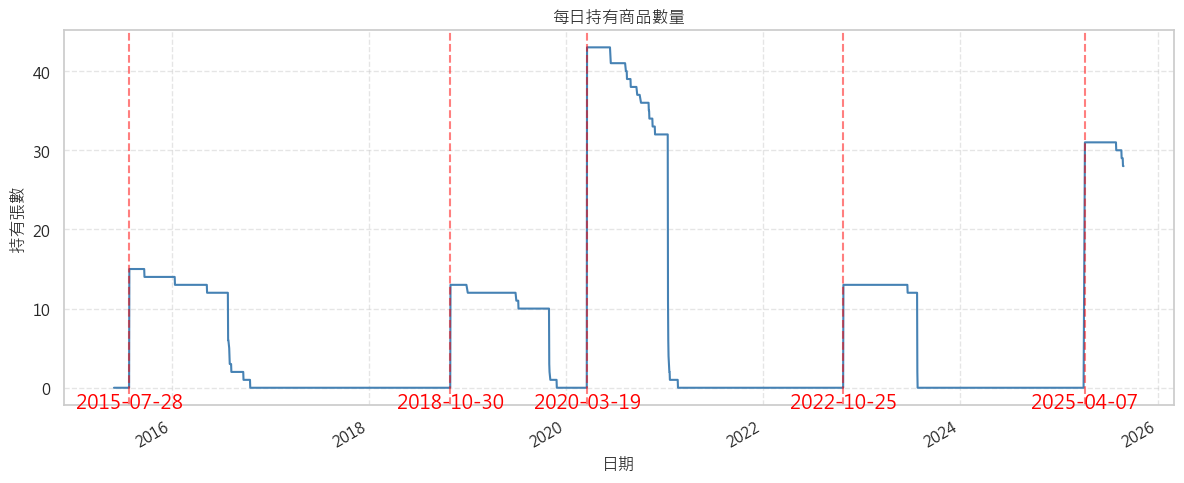

In [40]:
trades_df, drawdown_df = cb_strategy_market(
    df_close=df_close,
    cb_filtered=cb_filtered,
    df_index=df_index,
    stock_close=stock_close, 
    stock_volume=stock_volume,
    cb_volume_cleaned=cb_volume_cleaned,
    entry_threshold=0.7,
    exit_threshold=0.15,
    price_min=100,
    price_max=110,
    cooldown_days=90
)

#### 策略2-1：價格區間延伸策略 (進場前有突破120但回落)

買點：指標超過70% (每次觸發只抓第一筆，若在接續3個月內，即使再次超過70%，也不再進場)當作起始日，買進過去過去3個月曾經突破120但起始當日回落到...價格區間之策略

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

def cb_strategy_market(df_close, cb_filtered, df_index, stock_close, stock_volume, cb_volume_cleaned,
                                     entry_threshold=0.7, exit_threshold=0.15,
                                     price_min=100, price_max=110, cooldown_days=90, observation_window = 1):
    """
    可轉債策略模擬：
    - 根據「低於105佔比」判斷進場與出場時機
    - 篩選價格在合理區間的可轉債商品 
    - 記錄交易、持有期間、報酬率
    - 追蹤台股大盤在進場後的最大回檔與回復時間
    
    entry_threshold:進場門檻
    exit_thereshold:出場門檻
    price_min/max:可轉債價格篩選區間
    cooldown_days:進場冷卻期 (避免過度交易)
    """

    # 時間格式處理
    cb_filtered.index = pd.to_datetime(cb_filtered.index)
    df_close.index = pd.to_datetime(df_close.index)
    df_index.index = pd.to_datetime(df_index.index)
    cb_volume_cleaned.index = pd.to_datetime(cb_volume_cleaned.index)
    stock_close.index = pd.to_datetime(stock_close.index)

    trades = [] # 儲存交易紀錄
    drawdowns = [] # 除存台股最大回檔紀錄
    daily_holding = pd.Series(0, index=df_close.index) # 每日持有商品數量
    last_entry_date = pd.Timestamp('1900-01-01') # 初始進場日設定
    used_entry_dates = set() # 用來排除重複進場日
    today = pd.Timestamp.today() # 捕捉今日日期
    recorded_cb_entries = set()

    # 逐日檢查是否符合進場條件
    for current_date in cb_filtered.index:
        # 若還在冷卻期則跳過
        if current_date < last_entry_date + timedelta(days=cooldown_days):
            continue
        # 若市場狀況不符合進場門檻則跳過
        if cb_filtered.loc[current_date, '低於 105 佔比'] < entry_threshold:
            continue
        if current_date not in df_close.index or current_date not in df_index.index:
            continue

        observation_dates = cb_filtered.loc[current_date:].index[:observation_window]
        
        prices_today = df_close.loc[current_date]
        selected_cb = []

        for cb_code in prices_today.dropna().index:
            entry_price = prices_today[cb_code]
            # 新增：成交金額篩選條件
            cb_volume_series = cb_volume_cleaned[cb_code].dropna()
            obs_volume = cb_volume_series.reindex(observation_dates).dropna()
            cb_avg_volume = obs_volume.mean()

            # 價格區間判斷
            if entry_price < price_min or entry_price > price_max:
                continue

            # 新增條件：過去曾突破 120，但目前回落至 100~110
            lookback_days = 90
            cb_series = df_close[cb_code].dropna()
            past_window = cb_series.loc[:current_date].tail(lookback_days)

            # 計算最高價與時間點
            max_price = past_window.max()
            max_date = past_window.idxmax()
            days_since_max = (current_date - max_date).days
            price_upper_threshold = 120
            price_lower_bound = 100
            price_upper_bound = 110

            cb_series = df_close[cb_code].dropna()
            past_window = cb_series.loc[:current_date].tail(lookback_days)

            # 若過去未曾突破 120，則跳過
            if past_window.max() < price_upper_threshold:
                continue

            # 若目前價格不在 100~110 區間，則跳過
            if not (price_lower_bound <= entry_price <= price_upper_bound):
                continue

            # 符合條件，記錄進場
            selected_cb.append((cb_code, current_date, entry_price, cb_avg_volume, max_price, max_date, days_since_max))

        
        # 若無符合條件商品則跳過
        if not selected_cb:
            continue

        # 進場日紀錄，且挑選當日價格在合理區間之商品
        last_entry_date = current_date 
        index_entry = df_index.loc[current_date, 'Close'] # 紀錄台股大盤在進場日的點數
        
        # 檢查商品在進場日後是否仍存在交易日
        for cb_code, entry_date, entry_price, cb_avg_volume, max_price, max_date, days_since_max in selected_cb:
            cb_series = df_close[cb_code].dropna()
            last_trade_date = cb_series.index.max() # 找出序列出最晚的日期
            if last_trade_date == current_date:
                continue

            cb_series_after_entry = cb_series[cb_series.index > current_date]
            if cb_series_after_entry.empty:
                continue

            # 商品最後交易日
            last_trade_date = cb_series.index.max()
            exit_reason_1 = '商品到期'

            # 指標小於 0.15 的日子（從 current_date 往後找）
            future_cb = cb_filtered.loc[current_date:]
            early_exit = future_cb[future_cb['低於 105 佔比'] <= exit_threshold]
            exit_by_indicator = early_exit.index[0] if not early_exit.empty else None
            exit_reason_2 = '指標觸發'

            # 若該日無報價，順延往後找最近有報價的日子
            if exit_by_indicator and (exit_by_indicator not in df_close.index or pd.isna(df_close.loc[exit_by_indicator, cb_code])):
                cb_series_future = cb_series[cb_series.index > exit_by_indicator]
                if not cb_series_future.empty:
                    exit_by_indicator = cb_series_future.index[0]

            # 一年後
            exit_by_year = entry_date + timedelta(days=365)
            exit_reason_3 = '持有一年'
            if exit_by_year not in df_close.index or pd.isna(df_close.loc[exit_by_year, cb_code]):
                cb_series_future = cb_series[cb_series.index > exit_by_year]
                if not cb_series_future.empty:
                    exit_by_year = cb_series_future.index[0]

            # 整合三個候選日與理由
            exit_candidates = {
                last_trade_date: exit_reason_1,
                exit_by_indicator: exit_reason_2,
                exit_by_year: exit_reason_3
            }
            exit_candidates = {d: r for d, r in exit_candidates.items() if d is not None}
            exit_date = min(exit_candidates.keys())
            exit_reason = exit_candidates[exit_date]

            # 最終確認出場日有報價，否則順延
            if exit_date not in df_close.index or pd.isna(df_close.loc[exit_date, cb_code]):
                cb_series_future = cb_series[cb_series.index > exit_date]
                if cb_series_future.empty:
                    continue
                exit_date = cb_series_future.index[0]
                exit_reason += '（順延）'

            exit_price = df_close.loc[exit_date, cb_code]

            
            holding_days = (exit_date - entry_date).days
            return_pct = (exit_price - entry_price) / entry_price

            # 股票代碼（前四碼）
            stock_code = cb_code[:4]

            # 股票價格與報酬率
            stock_entry_price = stock_close.loc[entry_date, stock_code] if stock_code in stock_close.columns and current_date in stock_close.index else None
            stock_exit_price = stock_close.loc[exit_date, stock_code] if stock_code in stock_close.columns and exit_date in stock_close.index else None
            stock_return_pct = None
            if pd.notna(stock_entry_price) and pd.notna(stock_exit_price):
                stock_return_pct = (stock_exit_price - stock_entry_price) / stock_entry_price * 100

            # 平均成交金額（觀察期）
            avg_volume = None
            if stock_code in stock_volume.columns:
                volume_series = stock_volume.loc[entry_date:exit_date, stock_code]
                avg_volume = volume_series.mean()
            
            # 抓 CB 最低/高價與日期
            cb_period = cb_series.loc[entry_date:exit_date]
            cb_lowest_price = cb_period.min()
            cb_lowest_date = cb_period.idxmin()
            cb_highest_price = cb_period.max()
            cb_highest_date = cb_period.idxmax()


            # 抓股票最低/高價與日期
            if stock_code in stock_close.columns:
                stock_series = stock_close[stock_code].dropna()
                stock_period = stock_series.loc[entry_date:exit_date]

                if not stock_period.empty:
                    stock_lowest_price = stock_period.min()
                    stock_lowest_date = stock_period.idxmin()
                    stock_highest_price = stock_period.max()
                    stock_highest_date = stock_period.idxmax()
                else:
                    stock_lowest_price = None
                    stock_lowest_date = None
                    stock_highest_price = None
                    stock_highest_date = None
            else:
                stock_lowest_price = None
                stock_lowest_date = None
                stock_highest_price = None  # 修正 typo
                stock_highest_date = None

            if (cb_code, entry_date) in recorded_cb_entries:
                continue

            # 判斷是否符合流動性條件（聯集）
            cb_liquid = cb_avg_volume > 5_000_000 if cb_avg_volume is not None else False
            stock_liquid = avg_volume > 500_000_000 if avg_volume is not None else False

            if not (cb_liquid or stock_liquid):
                continue  # 若都不符合，跳過記錄

            trades.append({
                '商品代號': cb_code,
                '進場日': entry_date,
                '出場日': exit_date,
                '持有天數': holding_days,
                '進場價格': entry_price,
                '出場價格': exit_price,
                '報酬率(%)': round(return_pct * 100, 2),
                '出場原因': exit_reason,
                'CB平均成交金額(觀察期)': round(cb_avg_volume, 2),
                'CB流動性達標': cb_liquid,
                '股票進場價格': round(stock_entry_price, 2) if pd.notna(stock_entry_price) else None,
                '股票出場價格': round(stock_exit_price, 2) if pd.notna(stock_exit_price) else None,
                '股票報酬率(%)': round(stock_return_pct, 2) if stock_return_pct is not None else None,
                '股票平均成交金額(觀察期)': round(avg_volume, 2) if avg_volume is not None else None,
                '股票流動性達標': stock_liquid,

                '過去90日最高價': round(max_price, 2),
                '最高價日期': max_date.strftime('%Y-%m-%d'),
                '距離最高價天數': days_since_max,

                'CB最低價格日期': cb_lowest_date.strftime('%Y-%m-%d'),
                'CB最低價格': round(cb_lowest_price, 2),
                'CB最高價格日期': cb_highest_date.strftime('%Y-%m-%d'),
                'CB最高價格': round(cb_highest_price, 2),
                
                '股票最低價格日期': stock_lowest_date.strftime('%Y-%m-%d') if stock_lowest_date else None,
                '股票最低價格': round(stock_lowest_price, 2) if stock_lowest_price else None,
                '股票最高價格日期': stock_highest_date.strftime('%Y-%m-%d') if stock_highest_date else None,
                '股票最高價格': round(stock_highest_price, 2) if stock_highest_price else None
            })
            recorded_cb_entries.add((cb_code, entry_date))
            daily_holding.loc[current_date:exit_date] += 1

        # 台股大盤最大回檔追蹤（排除重複進場日）
        if current_date not in used_entry_dates:
            used_entry_dates.add(current_date)

            entry_date = current_date
            future_data = cb_filtered.loc[entry_date + timedelta(days=1):]
            exit_candidates = future_data[future_data['低於 105 佔比'] <= exit_threshold]
            exit_date = exit_candidates.index.min() if not exit_candidates.empty else None
            holding_days = (exit_date if exit_date else today) - entry_date
            last_entry_date = entry_date

            # 台股大盤進場點
            index_entry = df_index.loc[entry_date, 'Close']
            # 台股大盤出場點
            index_exit = df_index.loc[exit_date, 'Close'] if exit_date and exit_date in df_index.index else None

            # 台股最大回檔追蹤（半年）
            half_year_later = entry_date + timedelta(days=180)
            index_future = df_index.loc[entry_date:half_year_later]
            lowest_point = index_future['Close'].min()
            lowest_date = index_future['Close'].idxmin()
            drawdown_pct = (lowest_point - index_entry) / index_entry * 100
            recovery = df_index.loc[lowest_date:]
            recovery_date = recovery[recovery['Close'] >= index_entry].index.min()
            recovery_days = (recovery_date - entry_date).days if pd.notna(recovery_date) else None
            recovery_point = df_index.loc[recovery_date, 'Close'] if pd.notna(recovery_date) else None

            # 整體績效（出場點與進場點的差距）
            overall_return = ((index_exit - index_entry) / index_entry * 100) if index_exit else None

            drawdowns.append({
                '進場日': entry_date.strftime('%Y-%m-%d'),
                '進場大盤點位': round(index_entry, 2),
                '最低點日期': lowest_date.strftime('%Y-%m-%d'),
                '最低點大盤點位': round(lowest_point, 2),
                '下行時間': (lowest_date - entry_date).days,
                '下行幅度(%)': round(drawdown_pct, 2),
                '站回進場點時間': recovery_days,
                '站回進場點日期': recovery_date.strftime('%Y-%m-%d') if pd.notna(recovery_date) else None,
                '站回進場點大盤點位': round(recovery_point, 2) if recovery_point else None,
                '出場日': exit_date.strftime('%Y-%m-%d') if exit_date else None,
                '出場大盤點位': round(index_exit, 2) if index_exit else None,
                '持有時間': holding_days.days,
                '整體績效(%)': round(overall_return, 2) if overall_return else None
            })

    # 商品紀錄表
    trades_df = pd.DataFrame(trades)
    trades_df.to_csv("U:\CB數據庫\CB與大盤連結策略\商品紀錄表2-1.csv", encoding="utf-8-sig", index=False)

    # 最大回檔紀錄表
    drawdown_df = pd.DataFrame(drawdowns)
    drawdown_df.to_csv("U:\CB數據庫\CB與大盤連結策略\大盤數據與回檔2-1.csv", encoding="utf-8-sig", index=False)

    # 策略績效報告
    total_trades = len(trades_df)
    avg_return = trades_df['報酬率(%)'].mean()
    total_profit = 1000*(trades_df['出場價格'] - trades_df['進場價格']).sum()
    total_cost = 1000*trades_df['進場價格'].sum()
    total_revenue = 1000*trades_df['出場價格'].sum()
    win_rate = len(trades_df[trades_df['報酬率(%)'] > 0]) / total_trades * 100 if total_trades > 0 else 0
    avg_gain = trades_df[trades_df['報酬率(%)'] > 0]['報酬率(%)'].mean()
    avg_loss = abs(trades_df[trades_df['報酬率(%)'] < 0]['報酬率(%)'].mean())
    profit_ratio = avg_gain / avg_loss if avg_loss > 0 else None

    # 股票績效計算
    total_trades_stock = len(trades_df)
    avg_return_stock = trades_df['股票報酬率(%)'].mean()
    total_profit_stock = 1000*(trades_df['股票出場價格'] - trades_df['股票進場價格']).sum()
    total_cost_stock = 1000*trades_df['股票進場價格'].sum()
    total_revenue_stock = 1000*trades_df['股票出場價格'].sum()
    win_rate_stock = len(trades_df[trades_df['股票報酬率(%)'] > 0]) / total_trades_stock * 100 if total_trades_stock > 0 else 0
    avg_gain_stock = trades_df[trades_df['股票報酬率(%)'] > 0]['股票報酬率(%)'].mean()
    avg_loss_stock = abs(trades_df[trades_df['股票報酬率(%)'] < 0]['股票報酬率(%)'].mean())
    profit_ratio_stock = avg_gain_stock / avg_loss_stock if avg_loss_stock > 0 else None
    
    print(f"\n📈 CB策略績效報告\n")
    print(f"總交易筆數：{total_trades}")
    print(f"平均報酬率(%)：{round(avg_return, 2)}")
    print(f"總損益：{round(total_profit, 2):,}")
    print(f"總成本：{round(total_cost, 2):,}")
    print(f"總收入：{round(total_revenue, 2):,}")
    print(f"勝率(%)：{round(win_rate, 2)}")
    print(f"賺賠比：{round(profit_ratio, 2) if profit_ratio else '無法計算'}")

    print("\n📈 股票績效報告\n")
    print(f"總交易筆數：{total_trades_stock}")
    print(f"平均報酬率(%)：{round(avg_return_stock, 2)}")
    print(f"總損益：{round(total_profit_stock, 2):,}")
    print(f"總成本：{round(total_cost_stock, 2):,}")
    print(f"總收入：{round(total_revenue_stock, 2):,}")
    print(f"勝率(%)：{round(win_rate_stock, 2)}")
    print(f"賺賠比：{round(profit_ratio_stock, 2) if profit_ratio_stock else '無法計算'}")


    # 每日持有商品數量圖（從 2019/01/01 開始）
    plot_start = pd.to_datetime("2015-06-01")
    daily_holding_plot = daily_holding.loc[plot_start:]
    plt.figure(figsize=(12, 5))
    daily_holding_plot.plot(color='steelblue')
    for entry_date in trades_df['進場日'].drop_duplicates():
        if entry_date >= plot_start:
            plt.axvline(entry_date, color='red', linestyle='--', alpha=0.5)
            plt.text(entry_date, daily_holding_plot.min() - 0.5,
                 entry_date.strftime('%Y-%m-%d'),
                 rotation=0, color='red', fontsize=14, ha='center', va='top')

    plt.title("每日持有商品數量")
    plt.ylabel("持有張數")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    return trades_df, drawdown_df

<>:295: SyntaxWarning: invalid escape sequence '\C'
<>:299: SyntaxWarning: invalid escape sequence '\C'
<>:295: SyntaxWarning: invalid escape sequence '\C'
<>:299: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Psc.PT6202\AppData\Local\Temp\ipykernel_10172\72579774.py:295: SyntaxWarning: invalid escape sequence '\C'
  trades_df.to_csv("U:\CB數據庫\CB與大盤連結策略\商品紀錄表2-1.csv", encoding="utf-8-sig", index=False)
C:\Users\Psc.PT6202\AppData\Local\Temp\ipykernel_10172\72579774.py:299: SyntaxWarning: invalid escape sequence '\C'
  drawdown_df.to_csv("U:\CB數據庫\CB與大盤連結策略\大盤數據與回檔2-1.csv", encoding="utf-8-sig", index=False)



📈 CB策略績效報告

總交易筆數：55
平均報酬率(%)：50.21
總損益：2,915,600.0
總成本：5,752,950.0
總收入：8,668,550.0
勝率(%)：92.73
賺賠比：66.72

📈 股票績效報告

總交易筆數：55
平均報酬率(%)：90.41
總損益：4,496,670.0
總成本：4,963,530.0
總收入：9,460,200.0
勝率(%)：87.27
賺賠比：12.31


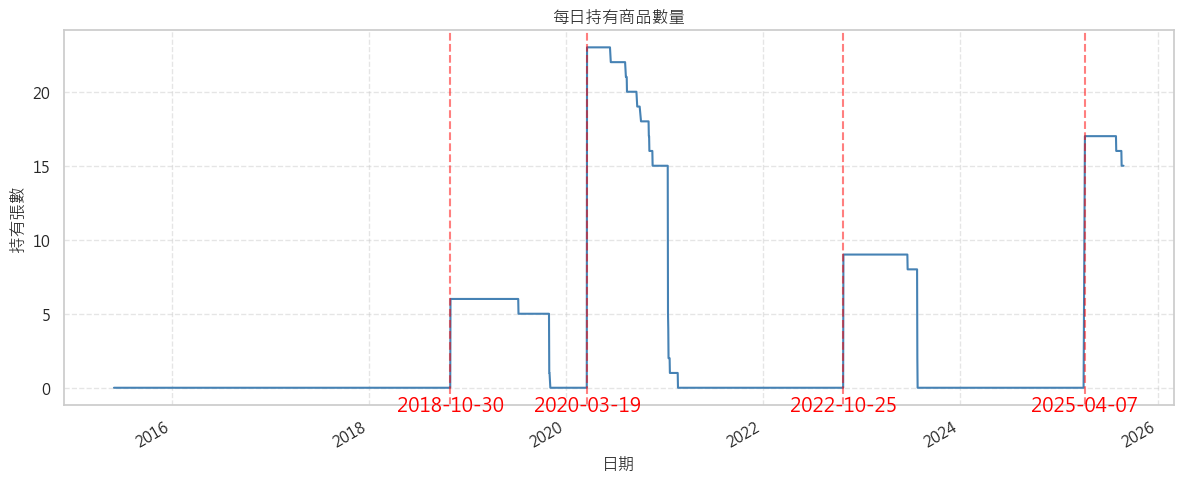

In [43]:
trades_df, drawdown_df = cb_strategy_market(
    df_close=df_close,
    cb_filtered=cb_filtered,
    df_index=df_index,
    stock_close=stock_close,
    stock_volume=stock_volume,
    cb_volume_cleaned=cb_volume_cleaned,
    entry_threshold=0.7,
    exit_threshold=0.15,
    price_min=100,
    price_max=110,
    cooldown_days=90
)

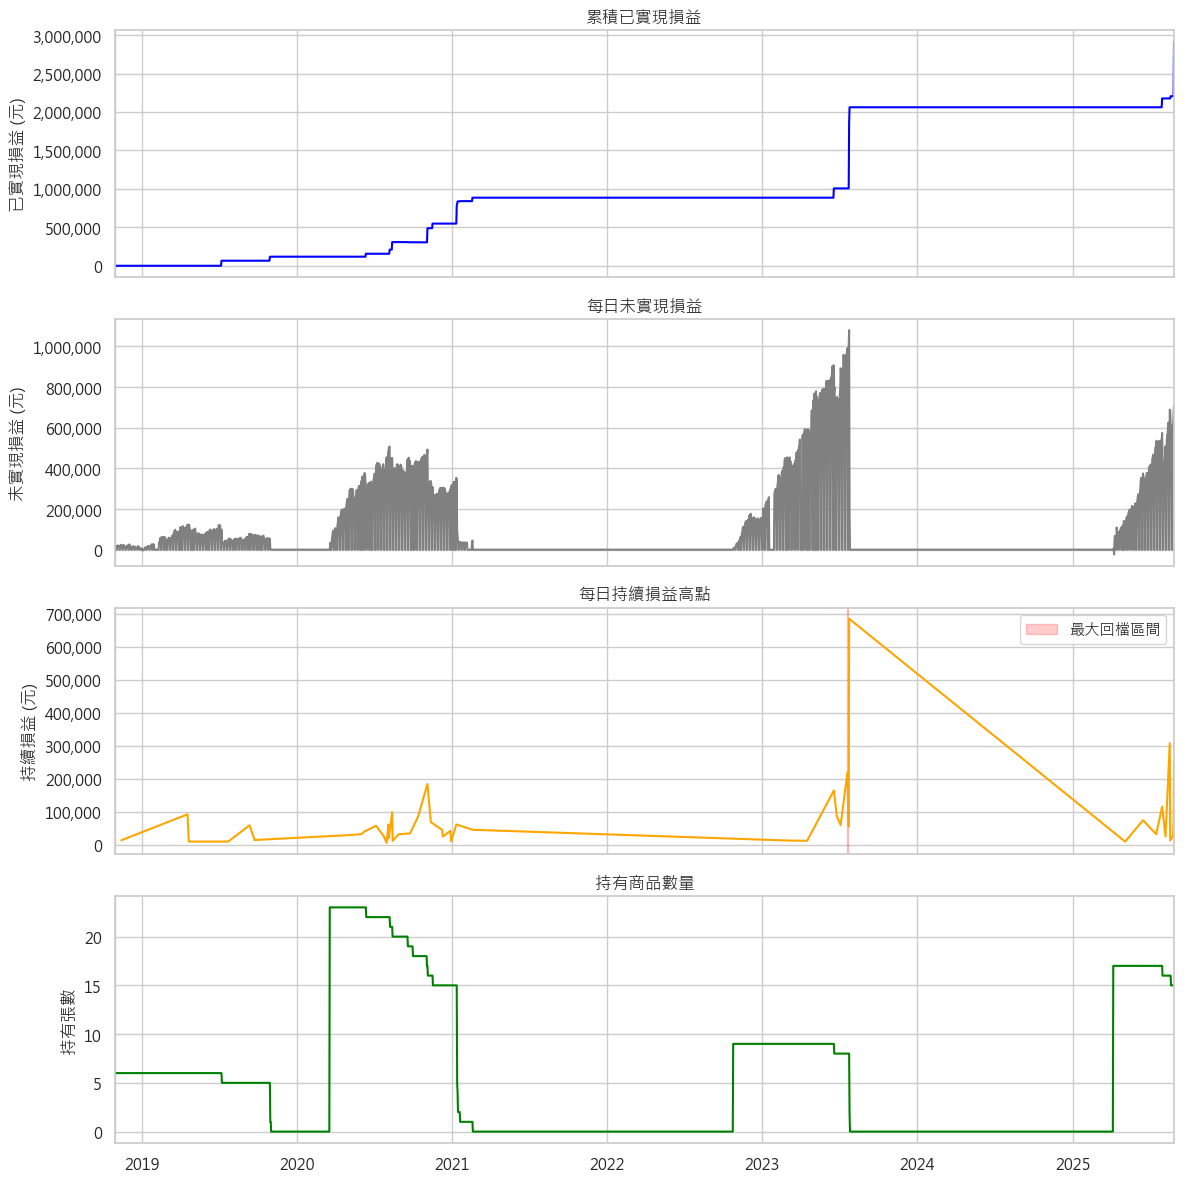


📉 最大回檔分析
最大回檔金額：-991,050 元
回檔起始日期：2023-07-21
回檔結束日期：2023-07-22
回檔期間：1 天


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

def plot_cb_strategy_performance(trades_df, df_close, unit=1000, plot_start="2015-06-01"):
    # 日期欄位轉換
    trades_df['進場日'] = pd.to_datetime(trades_df['進場日'])
    trades_df['出場日'] = pd.to_datetime(trades_df['出場日'])

    # 建立時間軸
    all_dates = pd.date_range(trades_df['進場日'].min(), trades_df['出場日'].max())
    daily_realized = pd.Series(0.0, index=all_dates)
    daily_unrealized = pd.Series(0.0, index=all_dates)
    daily_tracking = pd.Series(0.0, index=all_dates)
    daily_holding = pd.Series(0, index=all_dates)
    daily_peak_tracking = pd.Series(0.0, index=df_close.index)
    df_close = df_close.ffill()

    for _, row in trades_df.iterrows():
        entry = row['進場日']
        exit_ = row['出場日']
        code = row['商品代號']
        entry_price = row['進場價格']
        exit_price = row['出場價格']

        price_series = df_close.loc[entry:exit_, code].dropna()
        if price_series.empty:
            continue
        tracking_series = (price_series - entry_price) * unit
        tracking_series.iloc[-1] += (exit_price - price_series.iloc[-1]) * unit  # 加上已實現損益

        # 找出該筆交易的最高損益與日期
        peak_value = tracking_series.max()
        peak_date = tracking_series.idxmax()

        # 標記在 daily_peak_tracking 上
        daily_peak_tracking[peak_date] += peak_value

        # 計算未實現損益（持倉期間）
        unrealized = (price_series - entry_price) * unit
        daily_unrealized[unrealized.index] += unrealized

        # 記錄持倉
        daily_holding.loc[entry:exit_] += 1

        # 出場日記錄已實現損益
        realized = (exit_price - entry_price) * unit
        daily_realized[exit_] += realized

    # 累積已實現損益
    cumulative_realized = daily_realized.cumsum()

    # 持續損益：已實現 + 當日未實現
    daily_tracking = cumulative_realized + daily_unrealized
    tracking_high = daily_tracking.cummax()

    # 最大回檔計算（以持續損益為基準）
    rolling_max = daily_tracking.cummax()
    drawdown = daily_tracking - rolling_max
    max_drawdown = drawdown.min()
    end_date = drawdown.idxmin()
    start_date = daily_tracking[:end_date][daily_tracking[:end_date] == rolling_max[:end_date].max()].idxmax()

    # 繪圖
    plot_start = pd.to_datetime(plot_start)
    plot_realized = cumulative_realized.loc[plot_start:]
    plot_unrealized = daily_unrealized.loc[plot_start:]
    plot_tracking = daily_tracking.loc[plot_start:]
    plot_holding = daily_holding.loc[plot_start:]

    fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
    for ax in axes:
        ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

    plot_realized.plot(ax=axes[0], title="累積已實現損益", color="blue")
    axes[0].set_ylabel("已實現損益 (元)")

    plot_unrealized.plot(ax=axes[1], title="每日未實現損益", color="gray", style="-")
    #plot_unrealized.cumsum().plot(ax=axes[1], title="累積未實現損益", color="gray")
    axes[1].set_ylabel("未實現損益 (元)")
    
    #plot_tracking = tracking_high.loc[plot_start:]
    #plot_tracking.plot(ax=axes[2], title="每日持續損益", color="orange", style="--")
    plot_peak_tracking = daily_peak_tracking.loc[plot_start:].replace(0, pd.NA).dropna()
    plot_peak_tracking.plot(ax=axes[2], title="每日持續損益高點", color="orange", style="-")
    axes[2].set_ylabel("持續損益 (元)")
    axes[2].axvspan(start_date, end_date, color='red', alpha=0.2, label='最大回檔區間')
    axes[2].legend()

    plot_holding.plot(ax=axes[3], title="持有商品數量", color="green")
    axes[3].set_ylabel("持有張數")


    plt.tight_layout()
    plt.show()

    # 顯示最大回檔資訊
    print(f"\n📉 最大回檔分析")
    print(f"最大回檔金額：{max_drawdown:,.0f} 元")
    print(f"回檔起始日期：{start_date.date()}")
    print(f"回檔結束日期：{end_date.date()}")
    print(f"回檔期間：{(end_date - start_date).days} 天")


plot_cb_strategy_performance(trades_df, df_close)


##### 延伸觀察

高點變高，報酬74.53% (最高報酬) (進場點部分類似於短期回檔) 48筆

高點變低，報酬5.25% (進場點部分類似於下行階段) 78筆

如果突破90日高點，賣出條件相同

如果一直不能突破90日高點，如果價格始終無法突破120，則當跌破100後

In [45]:
# 假設 trades_df 已經載入，且包含 'CB流動性達標' 和 '股票流動性達標' 兩欄
cb_only = trades_df[(trades_df['CB流動性達標'] == True) & (trades_df['股票流動性達標'] == False)]
stock_only = trades_df[(trades_df['CB流動性達標'] == False) & (trades_df['股票流動性達標'] == True)]
both_liquid = trades_df[(trades_df['CB流動性達標'] == True) & (trades_df['股票流動性達標'] == True)]

# 顯示各組筆數
print("✅ 做 CB 筆數：", len(cb_only))
print("✅ 做 股票 筆數：", len(stock_only))
print("✅ 兩者皆做 筆數：", len(both_liquid))

# 如果你想標記每筆交易的操作建議：
def classify_trade(row):
    if row['CB流動性達標'] and not row['股票流動性達標']:
        return '做CB'
    elif not row['CB流動性達標'] and row['股票流動性達標']:
        return '做股票'
    elif row['CB流動性達標'] and row['股票流動性達標']:
        return '兩者皆做'
    else:
        return '不做'

trades_df['操作建議'] = trades_df.apply(classify_trade, axis=1)

✅ 做 CB 筆數： 36
✅ 做 股票 筆數： 7
✅ 兩者皆做 筆數： 12


In [ ]:
df['損益'] = df['出場價格'] - df['進場價格']
df['是否獲利'] = df['損益'] > 0

total_trades = len(df)
win_rate = df['是否獲利'].mean() * 100
avg_return = df['報酬率(%)'].mean()
total_profit = 1000*df['損益'].sum()
total_cost = 1000*df['進場價格'].sum()
total_revenue = 1000*df['出場價格'].sum()

profits = df[df['損益'] > 0]['損益']
losses = df[df['損益'] < 0]['損益']
profit_loss_ratio = profits.mean() / abs(losses.mean()) if len(losses) > 0 else None

print(f"\n📈 CB與股票組合策略績效報告\n")
print(f"總交易筆數：{total_trades}")
print(f"平均報酬率(%)：{round(avg_return, 2)}")
print(f"總損益：{round(total_profit, 2):,}")
print(f"總成本：{round(total_cost, 2):,}")
print(f"總收入：{round(total_revenue, 2):,}")
print(f"勝率(%)：{round(win_rate, 2)}")
print(f"賺賠比：{round(profit_loss_ratio, 2) if profit_loss_ratio else '無法計算'}")



📈 CB與股票組合策略績效報告

總交易筆數：65
平均報酬率(%)：61.33
總損益：5,608,890.0
總成本：8,064,050.0
總收入：13,672,940.0
勝率(%)：93.85
賺賠比：111.52


#### 策略3：無上限

買點：
指標超過70% (每次觸發只抓第一筆，若在接續3個月內，即使再次超過70%，也不再進場) 當作起始日，在當日買進CB價格高於100之商品

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

def cb_strategy_market(df_close, cb_filtered, df_index, stock_close, stock_volume,
                                     entry_threshold=0.7, exit_threshold=0.15,
                                     price_min=100, cooldown_days=90, observation_window = 1):
    """
    可轉債策略模擬：
    - 根據「低於105佔比」判斷進場與出場時機
    - 篩選價格在合理區間的可轉債商品 
    - 記錄交易、持有期間、報酬率
    - 追蹤台股大盤在進場後的最大回檔與回復時間
    
    entry_threshold:進場門檻
    exit_thereshold:出場門檻
    price_min/max:可轉債價格篩選區間
    cooldown_days:進場冷卻期 (避免過度交易)
    """

    # 時間格式處理
    cb_filtered.index = pd.to_datetime(cb_filtered.index)
    df_close.index = pd.to_datetime(df_close.index)
    df_index.index = pd.to_datetime(df_index.index)
    stock_close.index = pd.to_datetime(stock_close.index)

    trades = [] # 儲存交易紀錄
    drawdowns = [] # 除存台股最大回檔紀錄
    daily_holding = pd.Series(0, index=df_close.index) # 每日持有商品數量
    last_entry_date = pd.Timestamp('1900-01-01') # 初始進場日設定
    used_entry_dates = set() # 用來排除重複進場日
    today = pd.Timestamp.today() # 捕捉今日日期
    recorded_cb_entries = set()

    # 逐日檢查是否符合進場條件
    for current_date in cb_filtered.index:
        # 若還在冷卻期則跳過
        if current_date < last_entry_date + timedelta(days=cooldown_days):
            continue
        # 若市場狀況不符合進場門檻則跳過
        if cb_filtered.loc[current_date, '低於 105 佔比'] < entry_threshold:
            continue
        if current_date not in df_close.index or current_date not in df_index.index:
            continue

        observation_dates = cb_filtered.loc[current_date:].index[:observation_window]

        prices_today = df_close.loc[current_date]
        selected_cb = []

        for cb_code in prices_today.dropna().index:
            entry_price = prices_today[cb_code]

            # 價格區間判斷
            if entry_price < price_min:
                continue

            # 新增：成交金額篩選條件
            cb_volume_series = cb_volume_cleaned[cb_code].dropna()
            obs_volume = cb_volume_series.reindex(observation_dates).dropna()
            cb_avg_volume = obs_volume.mean()

            # 符合條件，記錄進場
            selected_cb.append((cb_code, current_date, entry_price, cb_avg_volume))

        
        # 若無符合條件商品則跳過
        if not selected_cb:
            continue

        # 進場日紀錄，且挑選當日價格在合理區間之商品
        last_entry_date = current_date 
        index_entry = df_index.loc[current_date, 'Close'] # 紀錄台股大盤在進場日的點數
        
        # 檢查商品在進場日後是否仍存在交易日
        for cb_code, entry_date, entry_price, cb_avg_volume in selected_cb:
            cb_series = df_close[cb_code].dropna()
            

            last_trade_date = cb_series.index.max() # 找出序列出最晚的日期
            if last_trade_date == current_date:
                continue

            cb_series_after_entry = cb_series[cb_series.index > current_date]
            if cb_series_after_entry.empty:
                continue

            # 商品最後交易日
            last_trade_date = cb_series.index.max()
            exit_reason_1 = '商品到期'

            # 指標小於 0.15 的日子（從 current_date 往後找）
            future_cb = cb_filtered.loc[current_date:]
            early_exit = future_cb[future_cb['低於 105 佔比'] <= exit_threshold]
            exit_by_indicator = early_exit.index[0] if not early_exit.empty else None
            exit_reason_2 = '指標觸發'

            # 若該日無報價，順延往後找最近有報價的日子
            if exit_by_indicator and (exit_by_indicator not in df_close.index or pd.isna(df_close.loc[exit_by_indicator, cb_code])):
                cb_series_future = cb_series[cb_series.index > exit_by_indicator]
                if not cb_series_future.empty:
                    exit_by_indicator = cb_series_future.index[0]

            # 一年後
            exit_by_year = entry_date + timedelta(days=365)
            exit_reason_3 = '持有一年'
            if exit_by_year not in df_close.index or pd.isna(df_close.loc[exit_by_year, cb_code]):
                cb_series_future = cb_series[cb_series.index > exit_by_year]
                if not cb_series_future.empty:
                    exit_by_year = cb_series_future.index[0]

            # 整合三個候選日與理由
            exit_candidates = {
                last_trade_date: exit_reason_1,
                exit_by_indicator: exit_reason_2,
                exit_by_year: exit_reason_3
            }
            exit_candidates = {d: r for d, r in exit_candidates.items() if d is not None}
            exit_date = min(exit_candidates.keys())
            exit_reason = exit_candidates[exit_date]

            # 最終確認出場日有報價，否則順延
            if exit_date not in df_close.index or pd.isna(df_close.loc[exit_date, cb_code]):
                cb_series_future = cb_series[cb_series.index > exit_date]
                if cb_series_future.empty:
                    continue
                exit_date = cb_series_future.index[0]
                exit_reason += '（順延）'

            exit_price = df_close.loc[exit_date, cb_code]

            
            holding_days = (exit_date - entry_date).days
            return_pct = (exit_price - entry_price) / entry_price

            # 股票代碼（前四碼）
            stock_code = cb_code[:4]

            # 股票價格與報酬率
            stock_entry_price = stock_close.loc[entry_date, stock_code] if stock_code in stock_close.columns and current_date in stock_close.index else None
            stock_exit_price = stock_close.loc[exit_date, stock_code] if stock_code in stock_close.columns and exit_date in stock_close.index else None
            stock_return_pct = None
            if pd.notna(stock_entry_price) and pd.notna(stock_exit_price):
                stock_return_pct = (stock_exit_price - stock_entry_price) / stock_entry_price * 100

            # 平均成交金額（觀察期）
            avg_volume = None
            if stock_code in stock_volume.columns:
                volume_series = stock_volume.loc[entry_date:exit_date, stock_code]
                avg_volume = volume_series.mean()
            
            # 抓 CB 最低/高價與日期
            cb_period = cb_series.loc[entry_date:exit_date]
            cb_lowest_price = cb_period.min()
            cb_lowest_date = cb_period.idxmin()
            cb_highest_price = cb_period.max()
            cb_highest_date = cb_period.idxmax()


            # 抓股票最低/高價與日期
            if stock_code in stock_close.columns:
                stock_series = stock_close[stock_code].dropna()
                stock_period = stock_series.loc[entry_date:exit_date]

                if not stock_period.empty:
                    stock_lowest_price = stock_period.min()
                    stock_lowest_date = stock_period.idxmin()
                    stock_highest_price = stock_period.max()
                    stock_highest_date = stock_period.idxmax()
                else:
                    stock_lowest_price = None
                    stock_lowest_date = None
                    stock_highest_price = None
                    stock_highest_date = None
            else:
                stock_lowest_price = None
                stock_lowest_date = None
                stock_highest_price = None  # 修正 typo
                stock_highest_date = None

            if (cb_code, entry_date) in recorded_cb_entries:
                continue

            # 判斷是否符合流動性條件（聯集）
            cb_liquid = cb_avg_volume > 5_000_000 if cb_avg_volume is not None else False
            stock_liquid = avg_volume > 500_000_000 if avg_volume is not None else False

            if not (cb_liquid or stock_liquid):
                continue  # 若都不符合，跳過記錄

            trades.append({
                '商品代號': cb_code,
                '進場日': entry_date,
                '出場日': exit_date,
                '持有天數': holding_days,
                '進場價格': entry_price,
                '出場價格': exit_price,
                '報酬率(%)': round(return_pct * 100, 2),
                '出場原因': exit_reason,
                'CB平均成交金額(觀察期)': round(cb_avg_volume, 2),
                'CB流動性達標': cb_liquid,
                '股票進場價格': round(stock_entry_price, 2) if pd.notna(stock_entry_price) else None,
                '股票出場價格': round(stock_exit_price, 2) if pd.notna(stock_exit_price) else None,
                '股票報酬率(%)': round(stock_return_pct, 2) if stock_return_pct is not None else None,
                '股票平均成交金額(觀察期)': round(avg_volume, 2) if avg_volume is not None else None,
                '股票流動性達標': stock_liquid,

                'CB最低價格日期': cb_lowest_date.strftime('%Y-%m-%d'),
                'CB最低價格': round(cb_lowest_price, 2),
                'CB最高價格日期': cb_highest_date.strftime('%Y-%m-%d'),
                'CB最高價格': round(cb_highest_price, 2),
                
                '股票最低價格日期': stock_lowest_date.strftime('%Y-%m-%d') if stock_lowest_date else None,
                '股票最低價格': round(stock_lowest_price, 2) if stock_lowest_price else None,
                '股票最高價格日期': stock_highest_date.strftime('%Y-%m-%d') if stock_highest_date else None,
                '股票最高價格': round(stock_highest_price, 2) if stock_highest_price else None,
            })
            recorded_cb_entries.add((cb_code, entry_date))
            daily_holding.loc[current_date:exit_date] += 1

        # 台股大盤最大回檔追蹤（排除重複進場日）
        if current_date not in used_entry_dates:
            used_entry_dates.add(current_date)

            entry_date = current_date
            future_data = cb_filtered.loc[entry_date + timedelta(days=1):]
            exit_candidates = future_data[future_data['低於 105 佔比'] <= exit_threshold]
            exit_date = exit_candidates.index.min() if not exit_candidates.empty else None
            holding_days = (exit_date if exit_date else today) - entry_date
            last_entry_date = entry_date

            # 台股大盤進場點
            index_entry = df_index.loc[entry_date, 'Close']
            # 台股大盤出場點
            index_exit = df_index.loc[exit_date, 'Close'] if exit_date and exit_date in df_index.index else None

            # 台股最大回檔追蹤（半年）
            half_year_later = entry_date + timedelta(days=180)
            index_future = df_index.loc[entry_date:half_year_later]
            lowest_point = index_future['Close'].min()
            lowest_date = index_future['Close'].idxmin()
            drawdown_pct = (lowest_point - index_entry) / index_entry * 100
            recovery = df_index.loc[lowest_date:]
            recovery_date = recovery[recovery['Close'] >= index_entry].index.min()
            recovery_days = (recovery_date - entry_date).days if pd.notna(recovery_date) else None
            recovery_point = df_index.loc[recovery_date, 'Close'] if pd.notna(recovery_date) else None

            # 整體績效（出場點與進場點的差距）
            overall_return = ((index_exit - index_entry) / index_entry * 100) if index_exit else None

            drawdowns.append({
                '進場日': entry_date.strftime('%Y-%m-%d'),
                '進場大盤點位': round(index_entry, 2),
                '最低點日期': lowest_date.strftime('%Y-%m-%d'),
                '最低點大盤點位': round(lowest_point, 2),
                '下行時間': (lowest_date - entry_date).days,
                '下行幅度(%)': round(drawdown_pct, 2),
                '站回進場點時間': recovery_days,
                '站回進場點日期': recovery_date.strftime('%Y-%m-%d') if pd.notna(recovery_date) else None,
                '站回進場點大盤點位': round(recovery_point, 2) if recovery_point else None,
                '出場日': exit_date.strftime('%Y-%m-%d') if exit_date else None,
                '出場大盤點位': round(index_exit, 2) if index_exit else None,
                '持有時間': holding_days.days,
                '整體績效(%)': round(overall_return, 2) if overall_return else None
            })

    # 商品紀錄表
    trades_df = pd.DataFrame(trades)
    trades_df.to_csv("U:\CB數據庫\CB與大盤連結策略\商品紀錄表3.csv", encoding="utf-8-sig", index=False)

    # 最大回檔紀錄表
    drawdown_df = pd.DataFrame(drawdowns)
    drawdown_df.to_csv("U:\CB數據庫\CB與大盤連結策略\大盤數據與回檔3.csv", encoding="utf-8-sig", index=False)

    # 策略績效報告
    total_trades = len(trades_df)
    avg_return = trades_df['報酬率(%)'].mean()
    total_profit = 1000*(trades_df['出場價格'] - trades_df['進場價格']).sum()
    total_cost = 1000*trades_df['進場價格'].sum()
    total_revenue = 1000*trades_df['出場價格'].sum()
    win_rate = len(trades_df[trades_df['報酬率(%)'] > 0]) / total_trades * 100 if total_trades > 0 else 0
    avg_gain = trades_df[trades_df['報酬率(%)'] > 0]['報酬率(%)'].mean()
    avg_loss = abs(trades_df[trades_df['報酬率(%)'] < 0]['報酬率(%)'].mean())
    profit_ratio = avg_gain / avg_loss if avg_loss > 0 else None

    # 股票績效計算
    total_trades_stock = len(trades_df)
    avg_return_stock = trades_df['股票報酬率(%)'].mean()
    total_profit_stock = 1000*(trades_df['股票出場價格'] - trades_df['股票進場價格']).sum()
    total_cost_stock = 1000*trades_df['股票進場價格'].sum()
    total_revenue_stock = 1000*trades_df['股票出場價格'].sum()
    win_rate_stock = len(trades_df[trades_df['股票報酬率(%)'] > 0]) / total_trades_stock * 100 if total_trades_stock > 0 else 0
    avg_gain_stock = trades_df[trades_df['股票報酬率(%)'] > 0]['股票報酬率(%)'].mean()
    avg_loss_stock = abs(trades_df[trades_df['股票報酬率(%)'] < 0]['股票報酬率(%)'].mean())
    profit_ratio_stock = avg_gain_stock / avg_loss_stock if avg_loss_stock > 0 else None
    
    print(f"\n📈 CB策略績效報告 (買進高於{price_min})\n")
    print(f"總交易筆數：{total_trades}")
    print(f"平均報酬率(%)：{round(avg_return, 2)}")
    print(f"總損益：{round(total_profit, 2)}")
    print(f"總成本：{round(total_cost, 2)}")
    print(f"總收入：{round(total_revenue, 2)}")
    print(f"勝率(%)：{round(win_rate, 2)}")
    print(f"賺賠比：{round(profit_ratio, 2) if profit_ratio else '無法計算'}")

    print("\n📈 股票策略績效報告\n")
    print(f"總交易筆數：{total_trades_stock}")
    print(f"平均報酬率(%)：{round(avg_return_stock, 2)}")
    print(f"總損益：{round(total_profit_stock, 2)}")
    print(f"總成本：{round(total_cost_stock, 2)}")
    print(f"總收入：{round(total_revenue_stock, 2)}")
    print(f"勝率(%)：{round(win_rate_stock, 2)}")
    print(f"賺賠比：{round(profit_ratio_stock, 2) if profit_ratio_stock else '無法計算'}")


    # 每日持有商品數量圖（從 2019/01/01 開始）
    plot_start = pd.to_datetime("2015-01-01")
    daily_holding_plot = daily_holding.loc[plot_start:]
    plt.figure(figsize=(12, 5))
    daily_holding_plot.plot(color='steelblue')
    for entry_date in trades_df['進場日'].drop_duplicates():
        if entry_date >= plot_start:
            plt.axvline(entry_date, color='red', linestyle='--', alpha=0.5)
            plt.text(entry_date, daily_holding_plot.min() - 0.5,
                 entry_date.strftime('%Y-%m-%d'),
                 rotation=0, color='red', fontsize=14, ha='center', va='top')

    plt.title("每日持有商品數量")
    plt.ylabel("持有張數")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    return trades_df, drawdown_df

<>:269: SyntaxWarning: invalid escape sequence '\C'
<>:273: SyntaxWarning: invalid escape sequence '\C'
<>:269: SyntaxWarning: invalid escape sequence '\C'
<>:273: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Psc.PT6202\AppData\Local\Temp\ipykernel_10172\508309449.py:269: SyntaxWarning: invalid escape sequence '\C'
  trades_df.to_csv("U:\CB數據庫\CB與大盤連結策略\商品紀錄表3.csv", encoding="utf-8-sig", index=False)
C:\Users\Psc.PT6202\AppData\Local\Temp\ipykernel_10172\508309449.py:273: SyntaxWarning: invalid escape sequence '\C'
  drawdown_df.to_csv("U:\CB數據庫\CB與大盤連結策略\大盤數據與回檔3.csv", encoding="utf-8-sig", index=False)



📈 CB策略績效報告 (買進高於100)

總交易筆數：146
平均報酬率(%)：33.76
總損益：5409400.0
總成本：15631100.0
總收入：21040500.0
勝率(%)：85.62
賺賠比：16.92

📈 股票策略績效報告

總交易筆數：146
平均報酬率(%)：61.33
總損益：7580020.0
總成本：13381670.0
總收入：20961690.0
勝率(%)：78.08
賺賠比：6.68


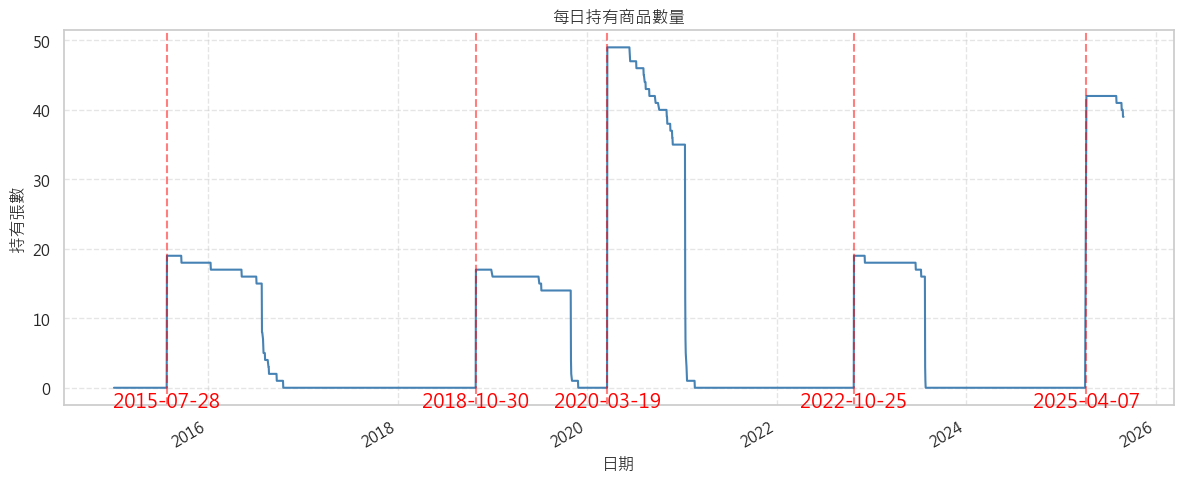

In [48]:
trades_df, drawdown_df = cb_strategy_market(
    df_close=df_close,
    cb_filtered=cb_filtered,
    df_index=df_index,
    stock_close=stock_close,
    stock_volume=stock_volume,
    entry_threshold=0.7,
    exit_threshold=0.15,
    price_min=100,
    cooldown_days=90
)

#### 交易紀錄表分析

針對 trades_df 做分析
1. 計算平均買進成本、賣出成本
2. 進場日、出場日分布
3. 持有天數分析
4. 報酬率分布分析


In [202]:
trades_df = pd.read_csv("D:\Code\CB與大盤連結策略\商品紀錄表2.csv", encoding="utf-8-sig", parse_dates=True, low_memory=False)
trades_df

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Psc.PT6202\AppData\Local\Temp\ipykernel_3536\964967724.py:1: SyntaxWarning: invalid escape sequence '\C'
  trades_df = pd.read_csv("D:\Code\CB與大盤連結策略\商品紀錄表2.csv", encoding="utf-8-sig", parse_dates=True, low_memory=False)


,商品代號,進場日,出場日,持有天數,進場價格,出場價格,報酬率(%),出場原因,CB平均成交金額(觀察期),CB流動性達標,...,股票平均成交金額(觀察期),股票流動性達標,CB最低價格日期,CB最低價格,CB最高價格日期,CB最高價格,股票最低價格日期,股票最低價格,股票最高價格日期,股票最高價格
0,29151 潤全一,2015-07-28,2016-01-12,168,100.35,99.85,-0.50,商品到期,24141850.0,True,...,1.051597e+08,False,2015-08-26,99.45,2015-12-02,102.00,2015-08-26,34.03,2015-12-02,49.60
1,28883 新光金二,2015-07-28,2016-07-27,365,102.05,99.10,-2.89,持有一年,12339500.0,True,...,NaN,False,2015-08-27,98.50,2015-07-28,102.05,NaN,NaN,NaN,NaN
2,17043 榮化三,2015-07-28,2015-09-21,55,100.65,101.35,0.70,商品到期,23048000.0,True,...,NaN,False,2015-07-28,100.65,2015-09-18,101.35,NaN,NaN,NaN,NaN
3,61841 大豐一,2015-07-28,2016-05-10,287,108.00,104.90,-2.87,商品到期,9359250.0,True,...,3.794757e+06,False,2016-04-21,104.50,2015-09-15,109.00,2016-04-26,18.21,2015-09-15,28.67
4,84032 盛弘二,2015-07-28,2016-07-27,365,103.80,123.00,18.50,持有一年,9488300.0,True,...,3.311840e+07,False,2015-08-24,102.10,2015-12-01,149.05,2015-08-04,19.30,2015-11-25,32.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,81551 博智一,2025-04-07,2025-08-20,135,105.50,123.75,17.30,商品到期,10955200.0,True,...,2.943932e+08,False,2025-04-09,103.40,2025-08-18,132.80,2025-04-22,95.19,2025-08-18,158.00
109,15142 亞力二,2025-04-07,2025-08-20,135,102.00,109.00,6.86,商品到期,14066550.0,True,...,5.151046e+08,True,2025-04-09,99.50,2025-06-18,116.75,2025-04-09,77.40,2025-06-16,116.50
110,30455 台灣大五,2025-04-07,2025-08-20,135,101.65,101.95,0.30,商品到期,34000650.0,True,...,1.206106e+09,True,2025-07-30,101.50,2025-04-10,104.10,2025-07-25,105.50,2025-04-10,114.26
111,35483 兆利三,2025-04-07,2025-08-20,135,100.00,101.00,1.00,商品到期,16571050.0,True,...,1.483921e+08,False,2025-04-09,99.65,2025-06-19,105.90,2025-04-09,107.50,2025-06-19,134.50


平均買進價格：103.53
平均賣出價格：135.54


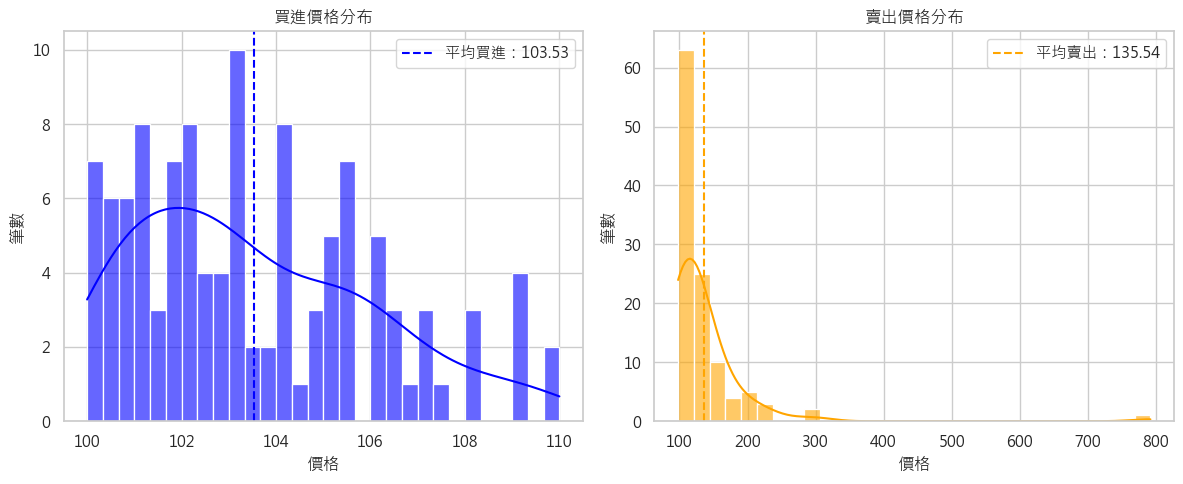

平均持有天數：250.05 天


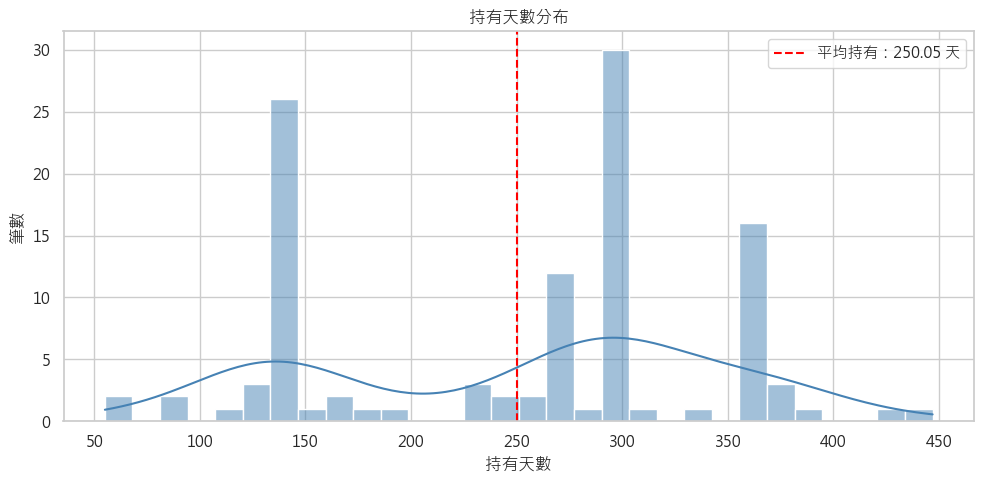

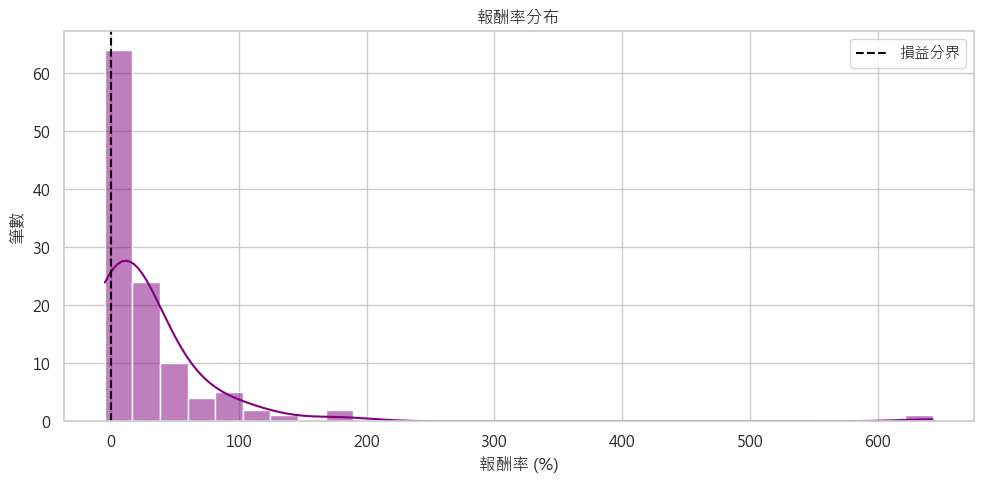

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import ticker as mtick
from matplotlib import rcParams

rcParams['font.family'] = 'Microsoft JhengHei'

# 平均買進/賣出價格
avg_buy_price = trades_df['進場價格'].mean()
avg_sell_price = trades_df['出場價格'].mean()
print(f"平均買進價格：{round(avg_buy_price, 2)}")
print(f"平均賣出價格：{round(avg_sell_price, 2)}")

plt.figure(figsize=(12, 5))

# 買進價格分布
plt.subplot(1, 2, 1)
sns.histplot(trades_df['進場價格'], bins=30, color='blue', kde=True, alpha=0.6)
plt.axvline(avg_buy_price, color='blue', linestyle='--', label=f'平均買進：{round(avg_buy_price,2)}')
plt.title("買進價格分布")
plt.xlabel("價格")
plt.ylabel("筆數")
plt.legend()

# 賣出價格分布
plt.subplot(1, 2, 2)
sns.histplot(trades_df['出場價格'], bins=30, color='orange', kde=True, alpha=0.6)
plt.axvline(avg_sell_price, color='orange', linestyle='--', label=f'平均賣出：{round(avg_sell_price,2)}')
plt.title("賣出價格分布")
plt.xlabel("價格")
plt.ylabel("筆數")
plt.legend()

plt.tight_layout()
plt.show()

# 平均持有天數
avg_holding_days = trades_df['持有天數'].mean()
print(f"平均持有天數：{round(avg_holding_days, 2)} 天")

# 持有天數分布圖
plt.figure(figsize=(10, 5))
sns.histplot(trades_df['持有天數'], bins=30, color='steelblue', kde=True)
plt.axvline(avg_holding_days, color='red', linestyle='--', label=f'平均持有：{round(avg_holding_days,2)} 天')
plt.title("持有天數分布")
plt.xlabel("持有天數")
plt.ylabel("筆數")
plt.legend()
plt.tight_layout()
plt.show()

# 報酬率分布圖
plt.figure(figsize=(10, 5))
sns.histplot(trades_df['報酬率(%)'], bins=30, color='purple', kde=True)
plt.axvline(0, color='black', linestyle='--', label='損益分界')
plt.title("報酬率分布")
plt.xlabel("報酬率 (%)")
plt.ylabel("筆數")
plt.legend()
plt.tight_layout()
plt.show()

In [204]:
# 計算各種出場原因的筆數
exit_reason_counts = trades_df['出場原因'].value_counts()

# 顯示結果
print("📌 出場原因筆數統計：")
for reason, count in exit_reason_counts.items():
    print(f"- {reason}：{count} 筆")

📌 出場原因筆數統計：
- 商品到期：47 筆
- 指標觸發：44 筆
- 持有一年：22 筆


#### 大盤數據與回檔分析

In [88]:
drawdown_df = pd.read_csv("D:\Code\CB與大盤連結策略\大盤數據與回檔1.csv", encoding="utf-8-sig", parse_dates=True, low_memory=False)
drawdown_df

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Psc.PT6202\AppData\Local\Temp\ipykernel_3536\65139770.py:1: SyntaxWarning: invalid escape sequence '\C'
  drawdown_df = pd.read_csv("D:\Code\CB與大盤連結策略\大盤數據與回檔1.csv", encoding="utf-8-sig", parse_dates=True, low_memory=False)


,進場日,進場大盤點位,最低點日期,最低點大盤點位,下行時間,下行幅度(%),站回進場點時間,站回進場點日期,站回進場點大盤點位,出場日,出場大盤點位,持有時間,整體績效(%)
0,2015-08-03,8482.92,2015-08-24,7203.07,21,-15.09,71,2015-10-13,8518.41,2016-08-02,9052.71,365,6.72
1,2018-11-05,9786.25,2019-01-04,9319.28,60,-4.77,77,2019-01-21,9870.27,2020-02-14,11788.87,466,20.46
2,2020-03-25,9426.43,2020-03-30,9415.52,5,-0.12,6,2020-03-31,9630.30,2021-01-15,15615.11,296,65.65
3,2022-10-31,12826.34,2022-10-31,12826.34,0,0.00,0,2022-10-31,12826.34,2023-07-25,17061.88,267,33.02
4,2025-04-11,18418.20,2025-04-11,18418.20,0,0.00,0,2025-04-11,18418.20,2025-08-20,23620.24,131,28.24
